In [4]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st
from privugger.Attacker import simulate, SimulationMetrics
from sklearn.feature_selection import mutual_info_regression
import theano
import theano.tensor as tt
import pymc3 as pm
from typing import *

In [2]:
def normal(ax, mu, sigma):
    x = np.linspace(mu-5, mu+5, 1000)
    pdf = st.norm.pdf(x, mu, sigma)
    ax.plot(x, pdf, label=f'$\mu$ = {mu}, $\sigma$ = {sigma}')
def uniform(ax, lower, upper):
    x = np.linspace(lower-10, upper+10, 1000)
    y = np.zeros(1000)
    y[(x<upper) & (x>lower)] = 1.0/(upper-lower)
    ax.plot(x,y)

# Test executed 2020 - 08 - 02

In [8]:
cs = pd.read_csv("Outputs/2020-08-02.csv", sep="!")
best = cs.sort_values(by="MUTUAL_INFO", ascending=False).drop_duplicates(subset="MUTUAL_INFO")
best

,N,AGE,NAME,MUTUAL_INFO
3,20,"['Normal', -9589.498199264528, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.05223179]
0,20,"['Normal', 0.0, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.04985109]
17,20,"['Normal', -8683.136304890035, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.04271525]
7,20,"['Normal', 2973.0493843392396, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.03505961]
5,20,"['Normal', 9987.801024948996, 0.1]","['BetaBinomial', 1, 0.001, 0.001]",[4.0200935]
...,...,...,...,...
194,20,"['Normal', -6912.1791469014415, 7675.487790361...","['BetaBinomial', 314, 7675.464777460519, 324.8...",[0.00083585]
68,20,"['Normal', -2308.077241471174, 3729.5028457749...","['Geometric', 0.373533775602217]",[0.00066527]
93,20,"['Normal', 18.61645259604972, 3005.0881919360727]","['Binomial', 3849, 0.7079508646007829]",[0.00056428]
128,20,"['Normal', 24.15262456744616, 1620.746584444763]","['Geometric', 0.5467647724167736]",[0.00050363]


[4.05223179, 4.04985109, 4.04271525]
[4.05223179, 4.04985109, 4.04271525]
[4.05223179, 4.04985109, 4.04271525]
["Normal'", ' -9589.498199264528', ' 0.1']
["Normal'", ' 0.0', ' 0.1']
["Normal'", ' -8683.136304890035', ' 0.1']


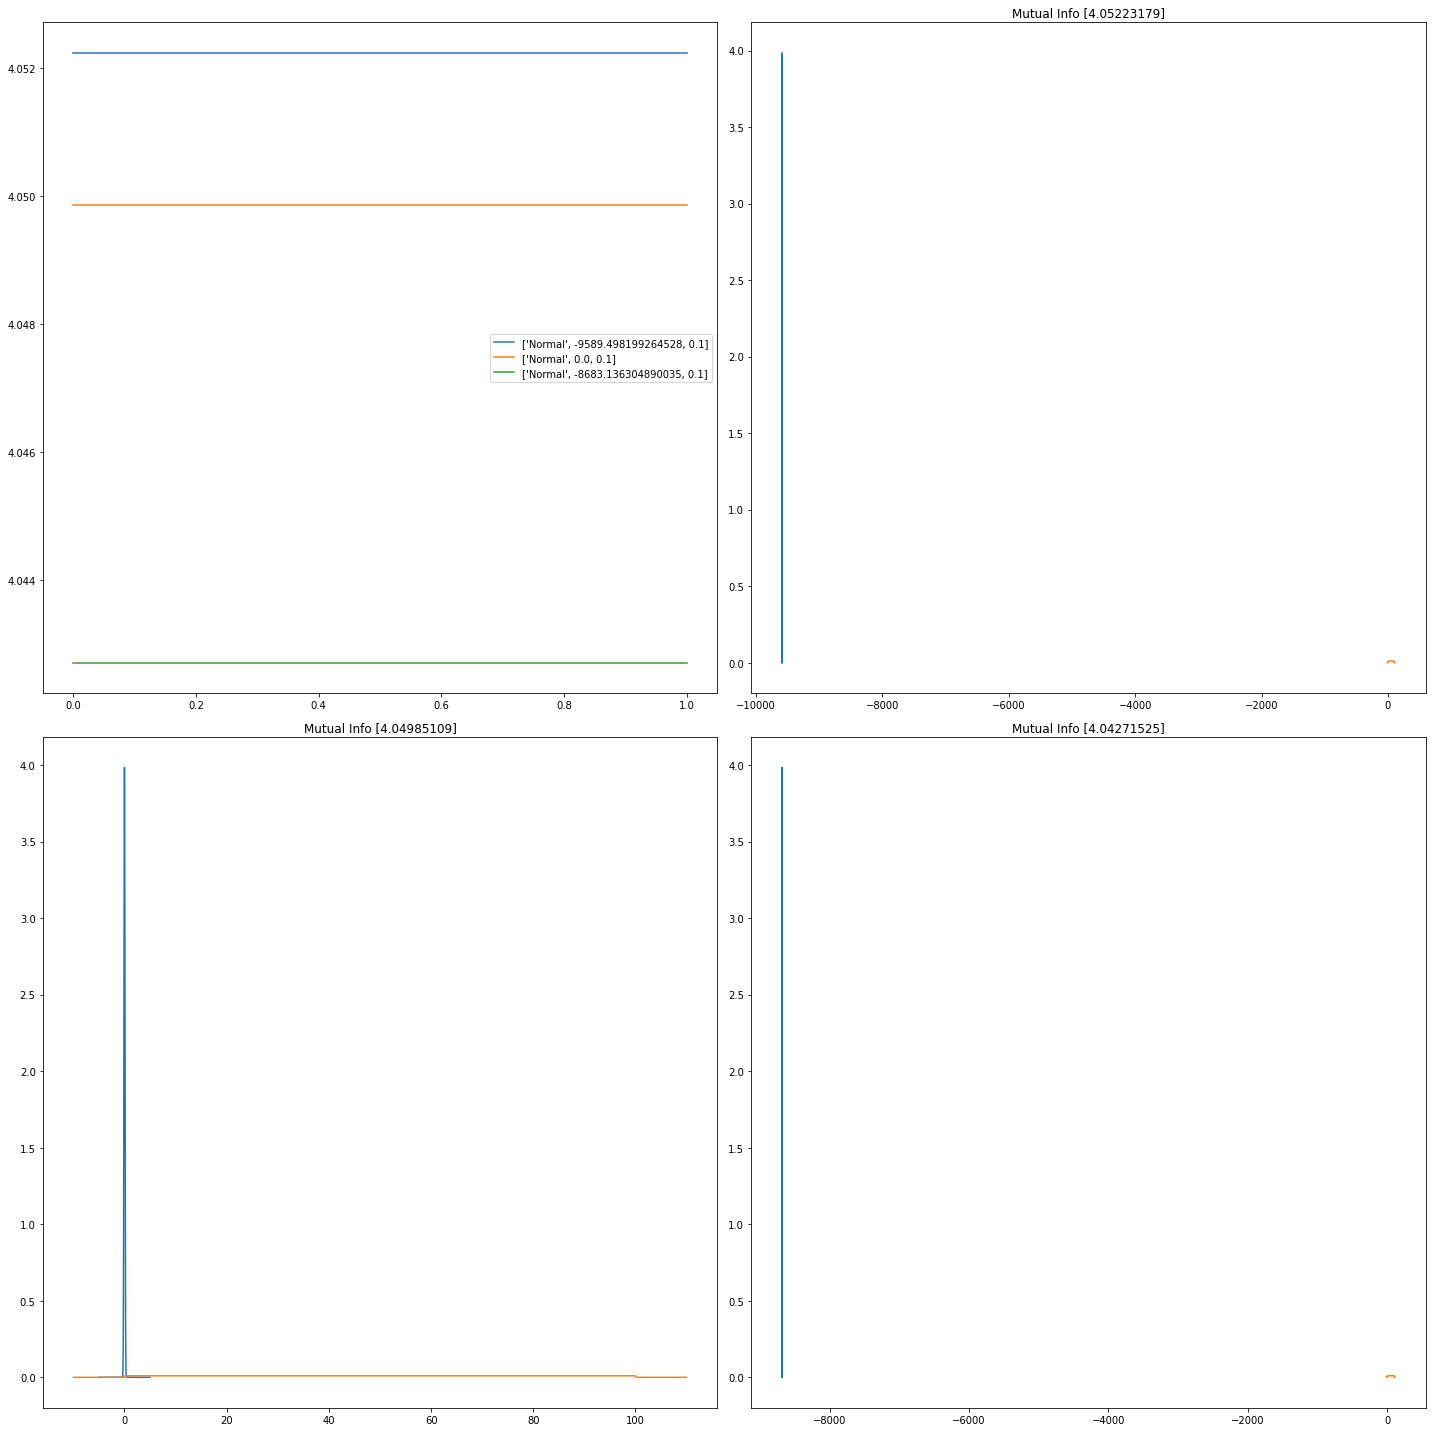

In [6]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
top = 3
info = [float(i) for i in best["MUTUAL_INFO"].str.strip("[]").head(top)]
for i in range(top):
    print(info)
    lab = best["AGE"].iloc[i]
    ax[0,0].plot(np.linspace(0,1,100),np.linspace(info[i],info[i],100), label=f"{lab}")
ax[0,0].legend(loc=0)
aks = [ax[0,1],ax[1,0],ax[1,1]]
for i in range(top):
    info_age = best["AGE"].iloc[i].strip("[]'").split(",")
    print(info_age)
    if info_age[0] == "Normal\'":
        normal(aks[i], float(info_age[1]), float(info_age[2]))
    aks[i].set_title(f"Mutual Info {best['MUTUAL_INFO'].iloc[i]}")
    uniform(aks[i],0,100)
plt.tight_layout()

# First full execution 2020 - 08 - 03

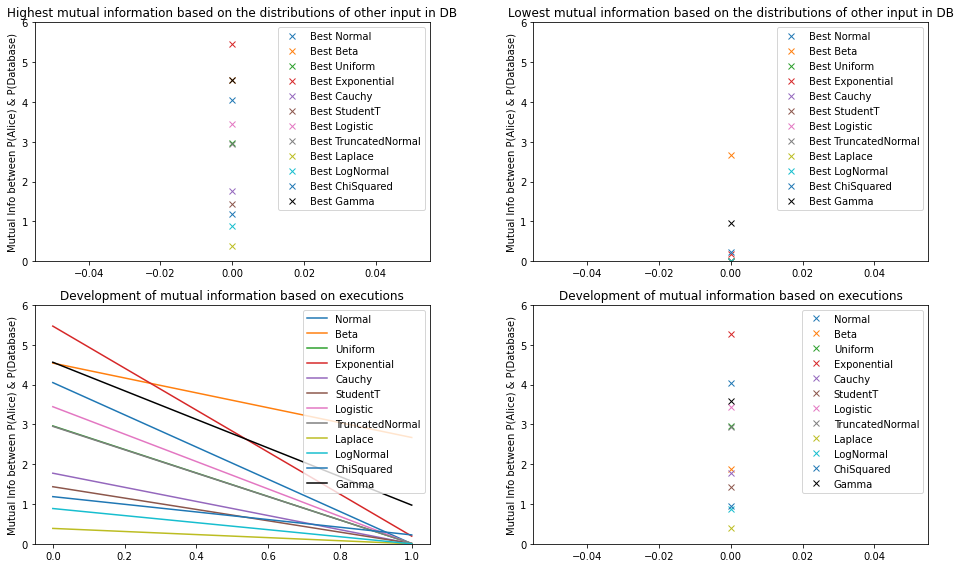

In [7]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import scipy.stats as st

df = pd.read_csv("Outputs/output_mutual_info_long_run.csv", sep="!")

df = df.sort_values(by=["INFO"], ascending=False)

normals = df[df["DIST"].str.startswith("Normal")]
beta = df[df["DIST"].str.startswith("Beta")]
uniform = df[df["DIST"].str.startswith("Uniform")]
exponential = df[df["DIST"].str.startswith("Exponential")]
cauchy = df[df["DIST"].str.startswith("Cauchy")]
studentt = df[df["DIST"].str.startswith("StudentT")]
logistic = df[df["DIST"].str.startswith("Logistic")]
truncatednormal = df[df["DIST"].str.startswith("TruncatedNormal")]
laplace = df[df["DIST"].str.startswith("Laplace")]
lognormal = df[df["DIST"].str.startswith("LogNormal")]
chisquared = df[df["DIST"].str.startswith("ChiSquared")]
gamma = df[df["DIST"].str.startswith("Gamma")]


fig, ax = plt.subplots(2,2, figsize=(14,8))

# Best distributions
ax[0,0].plot([0], normals["INFO"].head(1), "x", label="Best Normal")
ax[0,0].plot([0], beta["INFO"].head(1), "x", label="Best Beta")
ax[0,0].plot([0], uniform["INFO"].head(1), "x", label="Best Uniform")
ax[0,0].plot([0], exponential["INFO"].head(1), "x", label="Best Exponential")
ax[0,0].plot([0], cauchy["INFO"].head(1), "x", label="Best Cauchy")
ax[0,0].plot([0], studentt["INFO"].head(1), "x", label="Best StudentT")
ax[0,0].plot([0], logistic["INFO"].head(1), "x", label="Best Logistic")
ax[0,0].plot([0], truncatednormal["INFO"].head(1), "x", label="Best TruncatedNormal")
ax[0,0].plot([0], laplace["INFO"].head(1), "x", label="Best Laplace")
ax[0,0].plot([0], lognormal["INFO"].head(1), "x", label="Best LogNormal")
ax[0,0].plot([0], chisquared["INFO"].head(1), "x", label="Best ChiSquared")
ax[0,0].plot([0], gamma["INFO"].head(1), "x", label="Best Gamma", color=(0,0,0))

ax[0,0].set_ylim(0,6)
ax[0,0].set_ylabel("Mutual Info between P(Alice) & P(Database)")
ax[0,0].set_title("Highest mutual information based on the distributions of other input in DB")
ax[0,0].legend()
# Worst distributions
ax[0,1].plot([0], normals["INFO"].tail(1), "x", label="Best Normal")
ax[0,1].plot([0], beta["INFO"].tail(1), "x", label="Best Beta")
ax[0,1].plot([0], uniform["INFO"].tail(1), "x", label="Best Uniform")
ax[0,1].plot([0], exponential["INFO"].tail(1), "x", label="Best Exponential")
ax[0,1].plot([0], cauchy["INFO"].tail(1), "x", label="Best Cauchy")
ax[0,1].plot([0], studentt["INFO"].tail(1), "x", label="Best StudentT")
ax[0,1].plot([0], logistic["INFO"].tail(1), "x", label="Best Logistic")
ax[0,1].plot([0], truncatednormal["INFO"].tail(1), "x", label="Best TruncatedNormal")
ax[0,1].plot([0], laplace["INFO"].tail(1), "x", label="Best Laplace")
ax[0,1].plot([0], lognormal["INFO"].tail(1), "x", label="Best LogNormal")
ax[0,1].plot([0], chisquared["INFO"].tail(1), "x", label="Best ChiSquared")
ax[0,1].plot([0], gamma["INFO"].tail(1), "x", label="Best Gamma", color=(0,0,0))

ax[0,1].set_ylim(0,6)
ax[0,1].set_ylabel("Mutual Info between P(Alice) & P(Database)")
ax[0,1].set_title("Lowest mutual information based on the distributions of other input in DB")
ax[0,1].legend()

#Development between best and worst plot:
ax[1,0].plot([0,1], [normals["INFO"].head(1),normals["INFO"].tail(1)], label="Normal")
ax[1,0].plot([0,1], [beta["INFO"].head(1),beta["INFO"].tail(1)], label="Beta")
ax[1,0].plot([0,1], [uniform["INFO"].head(1),uniform["INFO"].tail(1)], label="Uniform")
ax[1,0].plot([0,1], [exponential["INFO"].head(1),exponential["INFO"].tail(1)], label="Exponential")
ax[1,0].plot([0,1], [cauchy["INFO"].head(1),cauchy["INFO"].tail(1)], label="Cauchy")
ax[1,0].plot([0,1], [studentt["INFO"].head(1),studentt["INFO"].tail(1)], label="StudentT")
ax[1,0].plot([0,1], [logistic["INFO"].head(1),logistic["INFO"].tail(1)], label="Logistic")
ax[1,0].plot([0,1], [truncatednormal["INFO"].head(1),truncatednormal["INFO"].tail(1)], label="TruncatedNormal")
ax[1,0].plot([0,1], [laplace["INFO"].head(1),laplace["INFO"].tail(1)], label="Laplace")
ax[1,0].plot([0,1], [lognormal["INFO"].head(1),lognormal["INFO"].tail(1)], label="LogNormal")
ax[1,0].plot([0,1], [chisquared["INFO"].head(1),chisquared["INFO"].tail(1)], label="ChiSquared")
ax[1,0].plot([0,1], [gamma["INFO"].head(1),gamma["INFO"].tail(1)], label="Gamma", color=(0,0,0))

ax[1,0].set_ylim(0,6)
ax[1,0].set_ylabel("Mutual Info between P(Alice) & P(Database)")
ax[1,0].set_title("Development of mutual information based on executions")
ax[1,0].legend()


#Diff plot
ax[1,1].plot([0], [float(normals["INFO"].head(1))-float(normals["INFO"].tail(1))],"x", label="Normal")
ax[1,1].plot([0], [float(beta["INFO"].head(1))-float(beta["INFO"].tail(1))],"x", label="Beta")
ax[1,1].plot([0], [float(uniform["INFO"].head(1))-float(uniform["INFO"].tail(1))],"x", label="Uniform")
ax[1,1].plot([0], [float(exponential["INFO"].head(1))-float(exponential["INFO"].tail(1))],"x", label="Exponential")
ax[1,1].plot([0], [float(cauchy["INFO"].head(1))-float(cauchy["INFO"].tail(1))],"x", label="Cauchy")
ax[1,1].plot([0], [float(studentt["INFO"].head(1))-float(studentt["INFO"].tail(1))],"x", label="StudentT")
ax[1,1].plot([0], [float(logistic["INFO"].head(1))-float(logistic["INFO"].tail(1))],"x", label="Logistic")
ax[1,1].plot([0], [float(truncatednormal["INFO"].head(1))-float(truncatednormal["INFO"].tail(1))],"x", label="TruncatedNormal")
ax[1,1].plot([0], [float(laplace["INFO"].head(1))-float(laplace["INFO"].tail(1))],"x", label="Laplace")
ax[1,1].plot([0], [float(lognormal["INFO"].head(1))-float(lognormal["INFO"].tail(1))],"x", label="LogNormal")
ax[1,1].plot([0], [float(chisquared["INFO"].head(1))-float(chisquared["INFO"].tail(1))],"x", label="ChiSquared")
ax[1,1].plot([0], [float(gamma["INFO"].head(1))-float(gamma["INFO"].tail(1))],"x", label="Gamma", color=(0,0,0))

ax[1,1].set_ylim(0,6)
ax[1,1].set_ylabel("Mutual Info between P(Alice) & P(Database)")
ax[1,1].set_title("Development of mutual information based on executions")
ax[1,1].legend()


# Plot
plt.legend()
plt.tight_layout()
plt.show()

# Evaluation
Based on the above figure it becomes evident that even though the best mutual information occurs with exponential, it is also the PDF that has the highest difference between its best and worst paramter.
Therefore assuming that the exact parameter/range of the distributions is unknown, it would be safer to make use of the beta distributions while still testing if such a distribution can reach a higher distributions.



### So is the method differentially private?
The answer is actually quite simple. No. Given that we are trying to find Alice. And after feeding it multiple distributions to the "encryption" method, there are still a very high correlation between the original alice and the output.

# Test executed 2020-10-13
This test was executed once Rasmus method was fully up and working. The method does the following:

It takes in the age of some individual and how often that person has had the flu. It than adds some static noise and concatenate the two values.

Such that the following database:

Age  | Times they had the flu
------------- | -------------
20  | 4
10  | 0
80 | 10
50 | 4

Will be converted to

After privacy protection mechanism |
------------- |
36  |
22  |
102 |
66 |

## So is this method secure?
The quick prior intuition here should be that it is not secure. Assuming we now the specific age of some individual we can narrow it down drastically to how often that person has had the flu.

In terms of distributions, we would have a quite high probability of guessing the age assuming the times they had flu were close to 0 (so a binomial with p(0.01))


## Time to analyse the result:

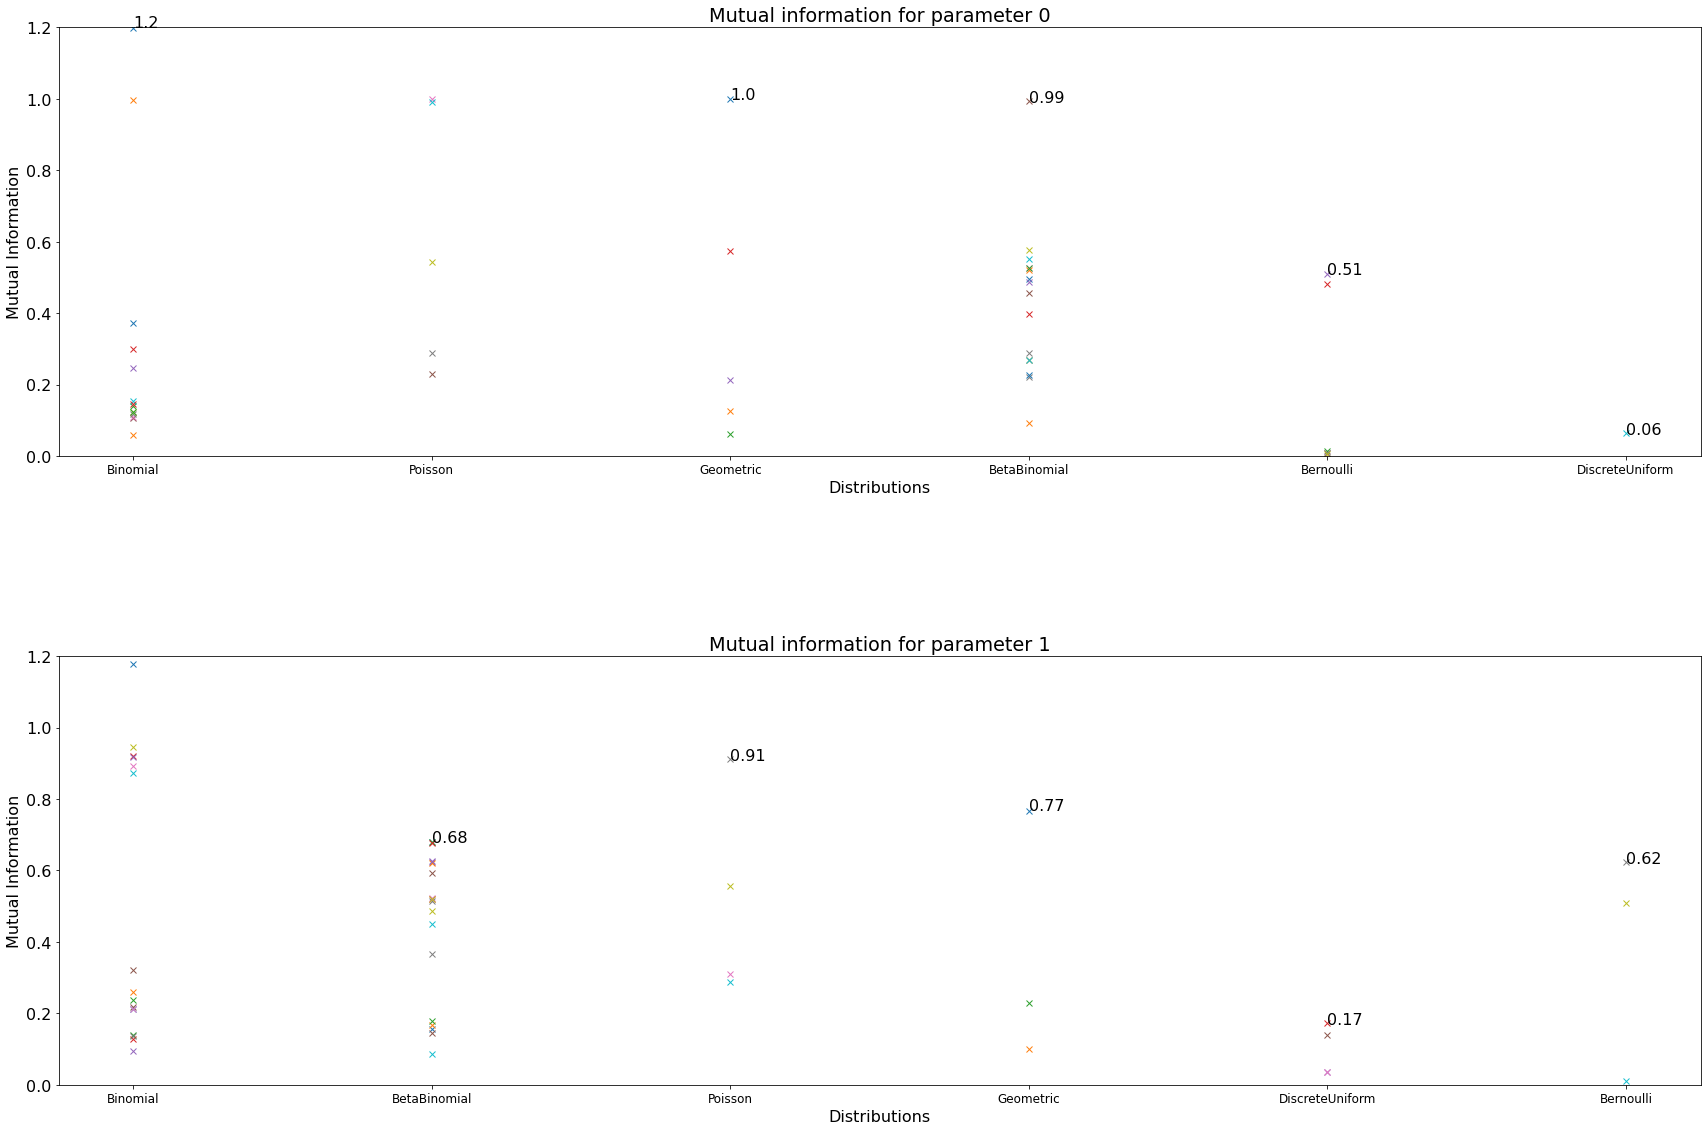

In [40]:
data = SimulationMetrics(path="metrics.priv")
plt.rcParams.update({'font.size': 16})
data.plot_mutual_information(figsize=(24,16))

In [4]:
I = data.mutual_information()

In [23]:
print("-------")
for (k,v),(k1,v1) in zip(I[0].items(), I[1].items()):
    best = max(enumerate(v), key=lambda x: x[1][0])
    pos = best[0]
    print(v[pos])
    print(v1[pos])
    print("------")

FOR AGE -------
(1.170967916442042, ['Binomial', 1, 0.001])
(1.1044154336441245, ['Binomial', 1, 0.001])
------
(inf, ['Poisson', 0.0])
(0.36581466454063477, ['BetaBinomial', 2477, 2221.6567224842224, 1514.6790525170359])
------
(0.9988911613118321, ['Geometric', 0.001])
(0.31228920167000335, ['Poisson', 9744.940469660141])
------
(0.9935809006823727, ['BetaBinomial', 1, 0.001, 0.001])
(0.7651977749401689, ['Geometric', 0.3307459906698485])
------
(0.5041181548845868, ['Bernoulli', 0.6097191741743646])
(0.13687037848126662, ['DiscreteUniform', 15, 41])
------
(0.06422100807019679, ['DiscreteUniform', 57, 73])
(0.6270115784018118, ['Bernoulli', 0.6097191741743646])
------


posx and posy should be finite values


For dist: Binomial the best values are [1, 0.001] for parameter 0
For dist: Poisson the best values are [0.0] for parameter 0
For dist: Geometric the best values are [0.001] for parameter 0
For dist: BetaBinomial the best values are [1, 0.001, 0.001] for parameter 0
For dist: Bernoulli the best values are [0.6097191741743646] for parameter 0
For dist: DiscreteUniform the best values are [57, 73] for parameter 0
------------------------------------------------------------
For dist: Binomial the best values are [1, 0.001] for parameter 1
For dist: BetaBinomial the best values are [6028, 6416.881746184584, 1037.8786899949607] for parameter 1
For dist: Poisson the best values are [6093.895026272546] for parameter 1
For dist: Geometric the best values are [0.3307459906698485] for parameter 1
For dist: DiscreteUniform the best values are [13, 49] for parameter 1
For dist: Bernoulli the best values are [0.6097191741743646] for parameter 1
------------------------------------------------------

posx and posy should be finite values


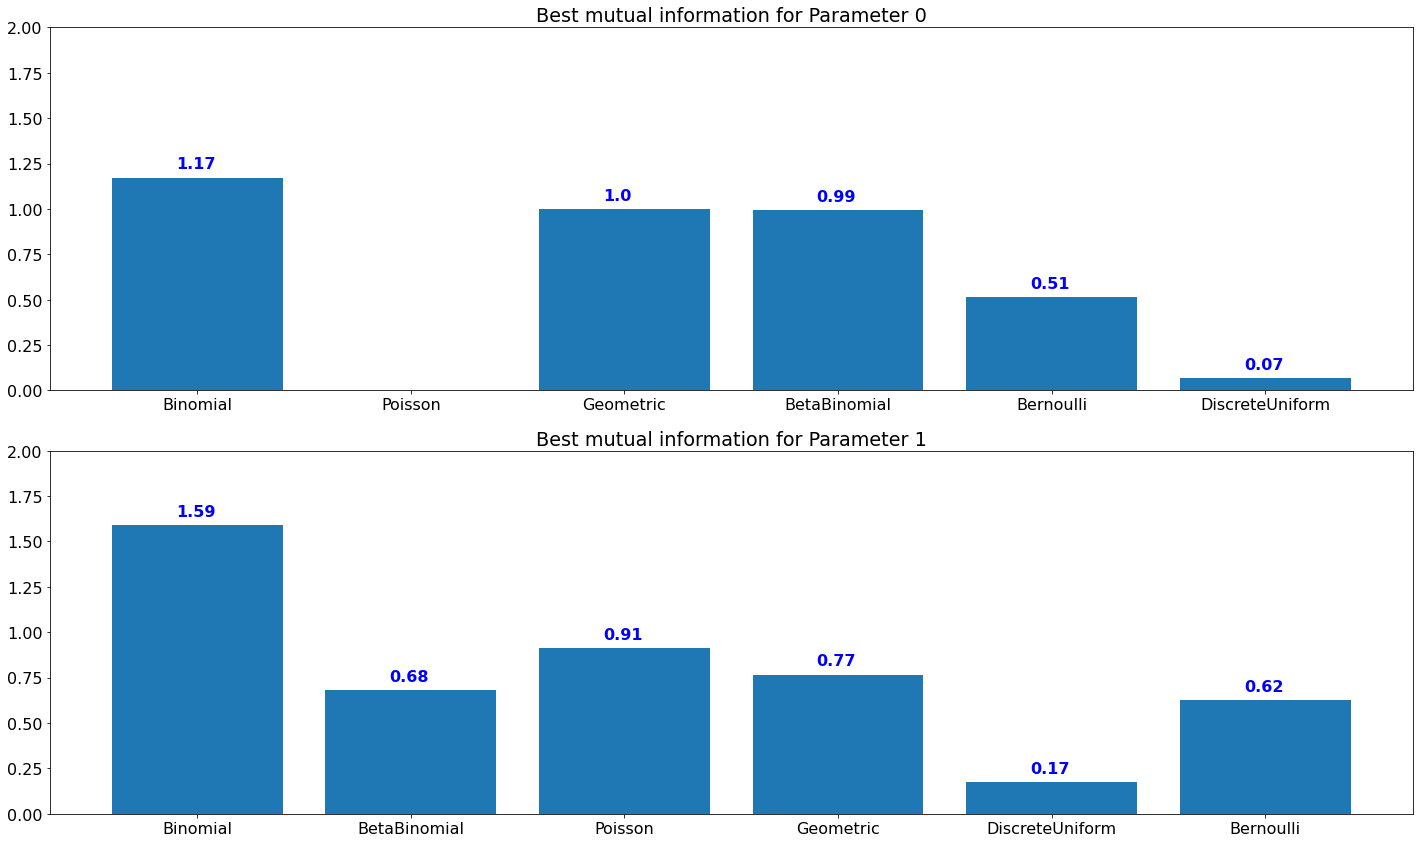

In [82]:
_, a = plt.subplots(2, figsize=(20,12))
plt.rcParams.update({'font.size': 16})
j = 0
for axs, i_s in zip(a, I):
    labels = []
    vals = []
    for (k,v),(k2,v2) in zip(i_s.items(), I[vals_other].items()):
        best = max(enumerate(v), key=lambda x: x[1][0])
        labels.append(k)
        vals.append(best[1][0])
        print(f"For dist: {k} the best values are {best[1][1][1:]} for parameter {j}")
    print("----"*15)
    axs.bar(labels, vals)
    for k, v in enumerate(vals):
        axs.text(k-0.1, v + 0.05, str(round(v,2)), color='blue', fontweight='bold')
    axs.set_title(f"Best mutual information for Parameter {j}")
    axs.set_ylim(0,2)
    j += 1
plt.tight_layout()
plt.show()
        
        

### Plotting the best distribution before and after

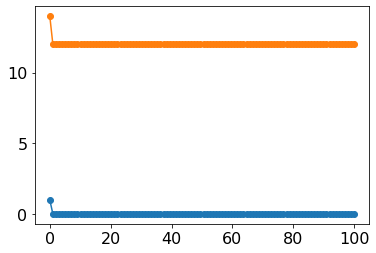

In [112]:
x = np.linspace(0,100,100)
n = 1
p = 0.01

y = st.binom.pmf(x, n, p)

output = (y+10+y+2)

plt.plot(x, y, '-o', label='n = {}, p = {}'.format(n, p))
plt.plot(x, output, '-o')
plt.show()

/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/arviz/data/io_pymc3.py:91: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


array([<AxesSubplot:title={'center':'intDist_0'}>,
       <AxesSubplot:title={'center':'intDist_1'}>,
       <AxesSubplot:title={'center':'Output'}>], dtype=object)

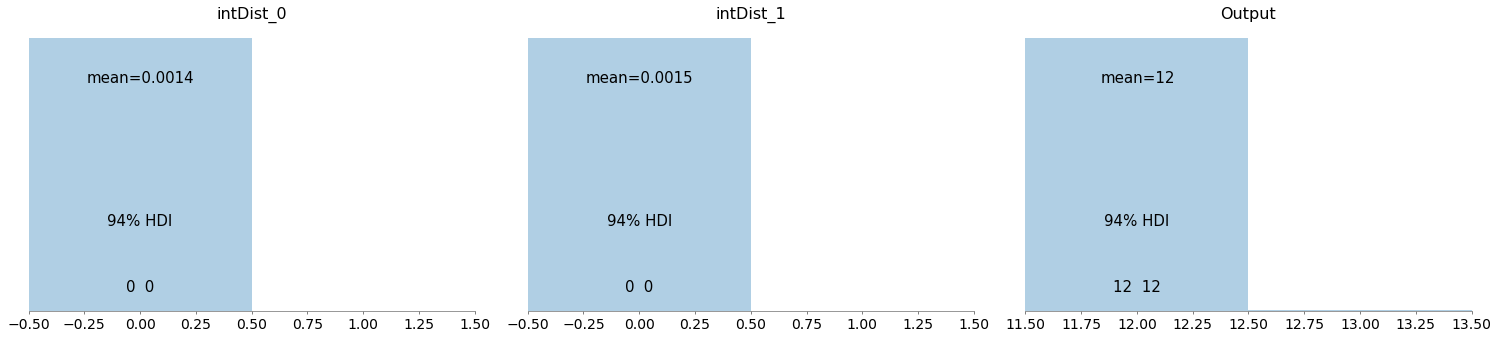

In [122]:
import pymc3 as pm
pm.plot_posterior(data.traces[0][0])

## Summary
So indeed the program those capture that binomial is in fact a better distribution (for an attacker) than using a discrete uniform. What is interesting however, is by such a large margin Binomial is best

### How come it be higher than 1 if it is normalised?
The way I see it the following should always hold

$\frac{I(X;Y)}{I(X;X)} \leq 1$

But in case that is not true. Than:

$I(X;Y) > I(X;X) $

If we expand the equation it also becomes clear that this can be the case:

$ \frac{I(X;Y)}{I(X;X)} = \frac{H(X)-H(X|Y)}{H(X)-H(X|X)} = \frac{H(X|Y)}{H(X|X)} $

which does not seem like such a unbelievable. This made me google a bit harder on how to normalize mutal information.
The best result was the following

* ASK WILLARD ABOUT THIS

$ \frac{I(X;Y)}{\sqrt{H(X)H(Y)}} $

# Problems with mutual information
Right now mutual information is a great metrics. However, after investigating a bit with Rasmus new format I found some issues that needs to be addressed.
That is also why I think this new class SimulationMetrics is such a better tool than what I previous used.

One problem with mutual Information is the password example. 
(It is also within "The science of quantative Information Flow)

Where a method simply returns 1 if the adversary guesses the password otherwise 0. Here mutual information is not a great metrics.

If we assume the following case:

Advesary ~ Binomial(n=10,p=0.001)
Password = 1024

The output would be simply 0's
Which would leave for almost 100% overlap in mutual information (which in fact does not show leakage?)

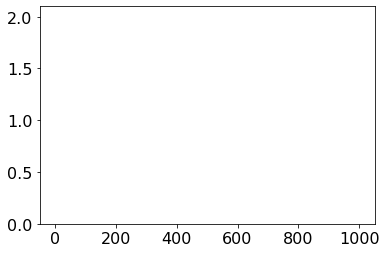

In [141]:
x = np.linspace(0,1.2,100)
n = 1
p = 0.01

y = st.binom.pmf(x, n, p)
plt.bar([0], [1], color="b")
plt.plot(x,y, color="r")
plt.show()

# Note for meeting 13-10-2020
## What Have I done since last:
* Merged with Rasmus. We can almost now have it executed by one line
    * `Analyse(method)`
* Expanded the decorator to also work as an abstract method that takes a method as parameter
    * Fixed a lot of errors within the program, both regarding constructing list and floats
* Created a new class that is used for metrics.
    * Makes it such that I can now safe and load a rung
        * Useful for when running a larger run on HPC
    * It can now dynamically plot by a simple call to a method (much similar to the pymc3 tools)
* Altered some names to be more real life reflective (Or similar to the research paper)
* Expanding some of the code to support some confidence interval
    * Questions regarding this: Those these thing have to go in the research paper?
* A LOT of analyzing data
* Started writing a bit more on the research paper (mostly formulas and general approach)
    * How long should it be? not necesarily length but more how much in depth it should be
* Reading on information theory and metrics
    * Elements of information theory is costing me a lot of papep /s 


## What needs to be done from my perspective
* Figure out why it can be so slow when running for $List[Tuple[int,float]]$
* Finish and analyze the long execution on HPC to see what can be done from that point of view
* Ensure that the distributions actually covers a greater range (Maybe this means going back to having `builds` of distributions and filter on them.
* Try out different metrics (maybe even add observation)
* Change mutual information to not be normalized


## Feedback
* (there are some interesting security concerns w/ Python Pickle. might be irrelevant, unless we're transmitting the serialized object over a network)
* Sent the outline to raul and andrzej
* 15 pages + 2 pr. person


# Meeting 21 - 10 - 2020

## What was supposed to be done since last. And what have I actually done:
- Figure out why it can be slow when running $ List[Tuple[int, float]] $
    - Not done
- Change the code such that for multiple parameters all other parameters than the target will be fixed (for X runs)
    - Done
- Analyse a way to more intuitively use the result for a primitive test (int -> int) (float -> float)
    - Done
    - Example below
- Setup outline for project
    - Done


## So for the more interesting stuff:
I actually wanted to showcase two things for todays session.
As I assume Rasmus already told you yesterday, we are slowly approaching a point of doing this analysis in a one line of code. We are not full there yet. But we are quite close:

So if we look at the following method:

```python
def password_checker(guess: int) -> int:
    return guess == 512
```

A similar example can also be found in the QIF book.
We know for a fact that this method is not secure, so ideally the program should tell us the same.

Were I was struggling, was actually with my understanding of mutual information.

Since I assumed that the distributions would not interline in the same areas. 
Assuming that $X \~ U(400,600)$ than Y would look something as:



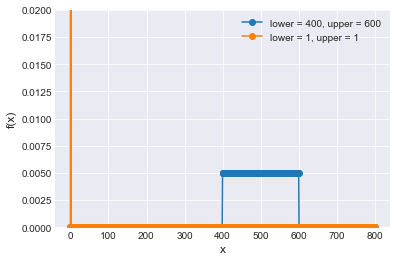

In [6]:
plt.style.use('seaborn-darkgrid')
X = (400,600)
Y = (1,1)

for l,u in [X,Y]:
    x = np.arange(l,u+1)
    pmf = [1.0 / (u - l + 1)] * len(x)
    x = np.arange(0,801)
    pmf = np.hstack((np.zeros(l), pmf, np.zeros(800-u)))
    plt.plot(x, pmf, '-o', label='lower = {}, upper = {}'.format(l, u))
plt.xlabel('x', fontsize=12)
plt.ylabel('f(x)', fontsize=12)
plt.ylim(0, 0.02)
plt.legend(loc=1)
plt.show()

Which in my first intuition seems wrong. So that I(X;Y) = 0, right? Well at least just looking at mutual information as the intersection $X \cap Y$.
But what is important is that I(X;Y) is defined as

 $ I(X;Y) = H(Y) - H(Y|X) = H(X) - H(X|Y) $

Which does in fact increase when X is within the range of the password.

#### So back to the code:
Firstly Rasmus part will convert the method to the following:


In [5]:
def method(guess: int) -> int:
    @theano.compile.ops.as_op(itypes=[tt.lscalar], otypes=[tt.lscalar])
    def password_checker(guess: int) ->int:
        password = 512
        return np.int64(guess == password)
    return password_checker(guess)

This method can than be analysed by my method in the following way:

In [6]:
# The result is a SimulationMetrics (A class I have defined)
metrics = simulate(method, max_examples=200, num_samples=4000)

Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
/Users/maoj/opt/anaconda3/envs/dev/lib/python3.7/site-packages/xarray/core/nputils.py:227: RuntimeWarning: All-NaN slice encountered
  result = getattr(npmodule, name)(values, axis=axis, **kwargs)


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.2 for some parameters.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 10% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
BinaryGibbsMetropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 2 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


Sequential sampling (2 chains in 1 job)
Metropolis: [intDist_0]


Sampling 2 chains for 1_000 tune and 4_000 draw iterations (2_000 + 8_000 draws total) took 1 seconds.
The number of effective samples is smaller than 25% for some parameters.


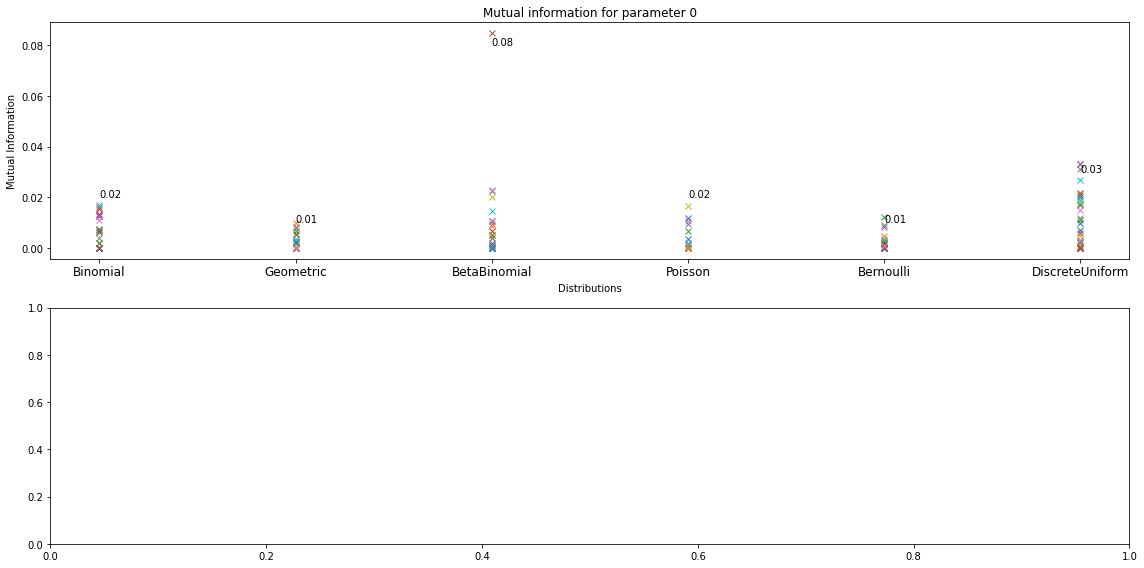

In [7]:
metrics.plot_mutual_information()

What I find interesting about the above plot, is that it seems to show that none of them are actually that good?

But what I found during some testing, is that we can actually take the best candidate and improve our testing even further:

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Uniform_950_1000]
>Metropolis: [Uniform_900_950]
>Metropolis: [Uniform_850_900]
>Metropolis: [Uniform_800_850]
>Metropolis: [Uniform_750_800]
>Metropolis: [Uniform_700_750]
>Metropolis: [Uniform_650_700]
>Metropolis: [Uniform_600_650]
>Metropolis: [Uniform_550_600]
>Metropolis: [Uniform_500_550]
>Metropolis: [Uniform_450_500]
>Metropolis: [Uniform_400_450]
>Metropolis: [Uniform_350_400]
>Metropolis: [Uniform_300_350]
>Metropolis: [Uniform_250_300]
>Metropolis: [Uniform_200_250]
>Metropolis: [Uniform_150_200]
>Metropolis: [Uniform_100_150]
>Metropolis: [Uniform_50_100]
>Metropolis: [Uniform_0_50]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 22 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


1010


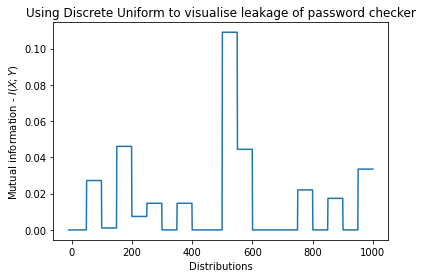

In [12]:
# Linear search with bin size and using DiscreteUniform
def linear_search(li,hi, bin_width=50):
    ranges = [(i,i+bin_width) for i in range(li,hi,bin_width)]
    x = np.linspace(0,0,10)
    with pm.Model() as model:
        i = 1
        for l,h in ranges:
            alice = pm.distributions.DiscreteUniform(f"Uniform_{l}_{h}", l,h)
            pm.Deterministic(f"Output{l}{h}", method(alice))
            print("\r " + str(i) + "/" + str(len(ranges)), end="\r")
            i+=1
        trace = pm.sample(cores=1)
        for l,h in ranges:
            I = mutual_info_regression([[a] for a in trace[f"Uniform_{l}_{h}"]], trace[f"Output{l}{h}"], discrete_features=True)[0]
            x_i = np.linspace(I,I, bin_width)
            x = np.hstack((x,x_i))
    print(len(x))
    plt.title("Using Discrete Uniform to visualise leakage of password checker")
    plt.ylabel("Mutual information - $I(X;Y)$")
    plt.xlabel("Distributions")
    plt.plot(np.linspace(li-10,hi, hi-li+10), x)
linear_search(0,1000,50)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Uniform_590_600]
>Metropolis: [Uniform_580_590]
>Metropolis: [Uniform_570_580]
>Metropolis: [Uniform_560_570]
>Metropolis: [Uniform_550_560]
>Metropolis: [Uniform_540_550]
>Metropolis: [Uniform_530_540]
>Metropolis: [Uniform_520_530]
>Metropolis: [Uniform_510_520]
>Metropolis: [Uniform_500_510]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 10 seconds.
The rhat statistic is larger than 1.05 for some parameters. This indicates slight problems during sampling.
The estimated number of effective samples is smaller than 200 for some parameters.


110


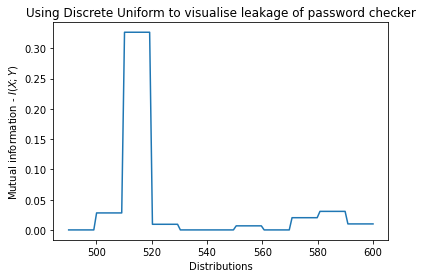

In [29]:
linear_search(500,600,10)

The best reached 0.08485841630414903, with n = 956, alpha = 9819.326265120235 and beta = 9048.503568071295


Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Uniform_950_1000]
>Metropolis: [Uniform_900_950]
>Metropolis: [Uniform_850_900]
>Metropolis: [Uniform_800_850]
>Metropolis: [Uniform_750_800]
>Metropolis: [Uniform_700_750]
>Metropolis: [Uniform_650_700]
>Metropolis: [Uniform_600_650]
>Metropolis: [Uniform_550_600]
>Metropolis: [Uniform_500_550]
>Metropolis: [Uniform_450_500]
>Metropolis: [Uniform_400_450]
>Metropolis: [Uniform_350_400]
>Metropolis: [Uniform_300_350]
>Metropolis: [Uniform_250_300]
>Metropolis: [Uniform_200_250]
>Metropolis: [Uniform_150_200]
>Metropolis: [Uniform_100_150]
>Metropolis: [Uniform_50_100]
>Metropolis: [Uniform_0_50]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 27 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


1010


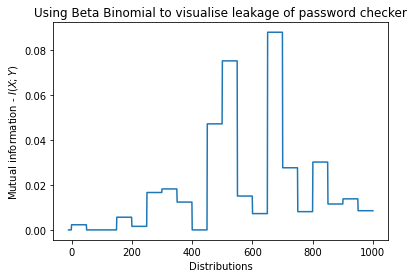

In [25]:
# We can do the same with betabinomial (A slightly more tricky). 
# But we could get the values of the best betabinomial out:
I, (name, n, alpha, beta) = max(metrics.mutual_information[0]["BetaBinomial"], key=lambda x: x[0])
print(f"The best reached {I}, with n = {n}, alpha = {alpha} and beta = {beta}")
def linear_search_binomial(li,hi,bin_width=50):
    ranges = [(i,i+bin_width) for i in range(li,hi,bin_width)]
    x = np.linspace(0,0,10)
    with pm.Model() as model:
        i = 1
        for l,h in ranges:
            center = (h+l)
            alice = pm.distributions.BetaBinomial(f"Uniform_{l}_{h}", alpha=alpha, beta=beta, n=center)
            pm.Deterministic(f"Output{l}{h}", method(alice))
            print("\r " + str(i) + "/" + str(len(ranges)), end="\r")
            i+=1
        trace = pm.sample(cores=1)
        for l,h in ranges:
            I = mutual_info_regression([[a] for a in trace[f"Uniform_{l}_{h}"]], trace[f"Output{l}{h}"], discrete_features=True)[0]
            x_i = np.linspace(I,I, bin_width)
            x = np.hstack((x,x_i))
    print(len(x))
    plt.title("Using Beta Binomial to visualise leakage of password checker")
    plt.ylabel("Mutual information - $I(X;Y)$")
    plt.xlabel("Distributions")
    plt.plot(np.linspace(li-10,hi, hi-li+10), x)
linear_search_binomial(0,1000,50)

Sequential sampling (2 chains in 1 job)
CompoundStep
>Metropolis: [Uniform_545_550]
>Metropolis: [Uniform_540_545]
>Metropolis: [Uniform_535_540]
>Metropolis: [Uniform_530_535]
>Metropolis: [Uniform_525_530]
>Metropolis: [Uniform_520_525]
>Metropolis: [Uniform_515_520]
>Metropolis: [Uniform_510_515]
>Metropolis: [Uniform_505_510]
>Metropolis: [Uniform_500_505]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 9 seconds.
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


60


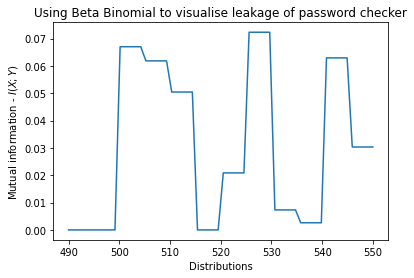

In [28]:
linear_search_binomial(500,550,5)

My theory would than be:
- Find the best random variable:
- Compute the mean and variance of that model
- Do linear search within the interval:
    - $ E[X] - Var(X) ; E[X] + Var(X) $

## For a bit more complex method:
```python
def meth(Age: int, Dissease: int) -> int:
    shift_age = Age + 10
    shift_Dissease = Dissease + 4
    return shift_age+shift_Dissease
```

As explained last time, the method simply does the following:

Age  | Times they had the flu
------------- | -------------
20  | 4
10  | 0
80 | 10
50 | 4

Will be converted to

After privacy protection mechanism |
------------- |
36  |
22  |
102 |
66 |

But for this I have actually used the HPC server to execute it. 
Since it was executed for 50 runs * (10 runs pr. fixed parameter) * 2 (# of parameters)

This can now be loaded in using our SimulationMetrics class


In [32]:
sm = SimulationMetrics(path="metrics2Par.priv")

In [95]:
def plot_for_multiple_par(shift=0):
    start, stop = 0,10
    executions = 5 #len(sm.traces)//2//10
    fig, ax = plt.subplots(executions,2, figsize=(20,18))
    for j in range(shift, shift+executions):
        for p in range(2):
            start = (p*10)+(j*20)
            stop = ((p*10)+10)+(j*20)
            traces = sm.traces[start:stop]
            Is = {}
            labels = []
            for i in range(10):
                trace = traces[i][0]
                name = traces[i][2][0]
                alice = trace[f"intDist_{i}"]
                output = trace[f"Output_{i}"]
                I = mutual_info_regression([[a] for a in alice], output, discrete_features=True)[0]
                if name[0] in Is:
                    Is[name[0]].append(I)
                else:
                    labels.append(name[0])
                    Is[name[0]] = [I]
            values = len(Is.keys())
            vals = [max(v[1]) for v in Is.items()]
            ax[j-shift][p].bar(labels, vals)
            ax[j-shift][p].set_ylim(0,7)
            ax[j-shift][p].set_title(f"Parameter {p} opposite was {sm.traces[start+stop//2][2][1]}")
            ax[j-shift][p].set_ylabel("$I(X;Y)$")
        print("\r" + str(j) , end="\r")
    plt.tight_layout()

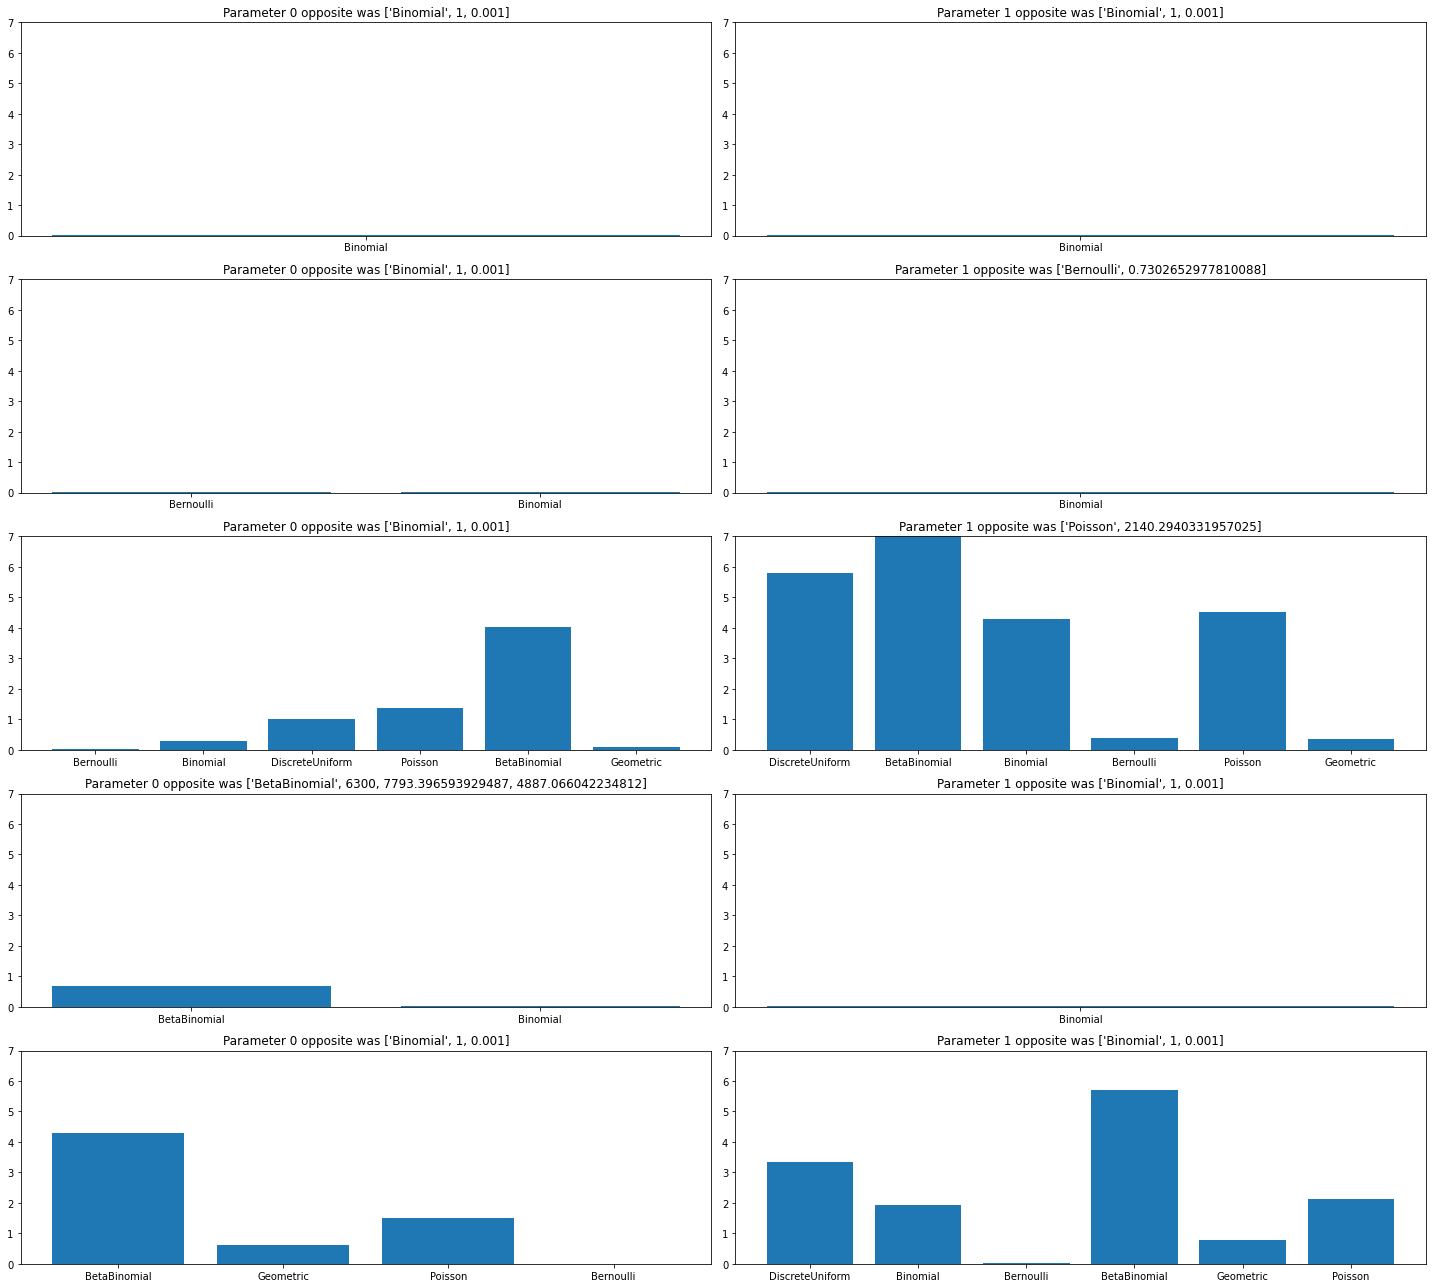

In [96]:
plot_for_multiple_par()

IndexError: list index out of range

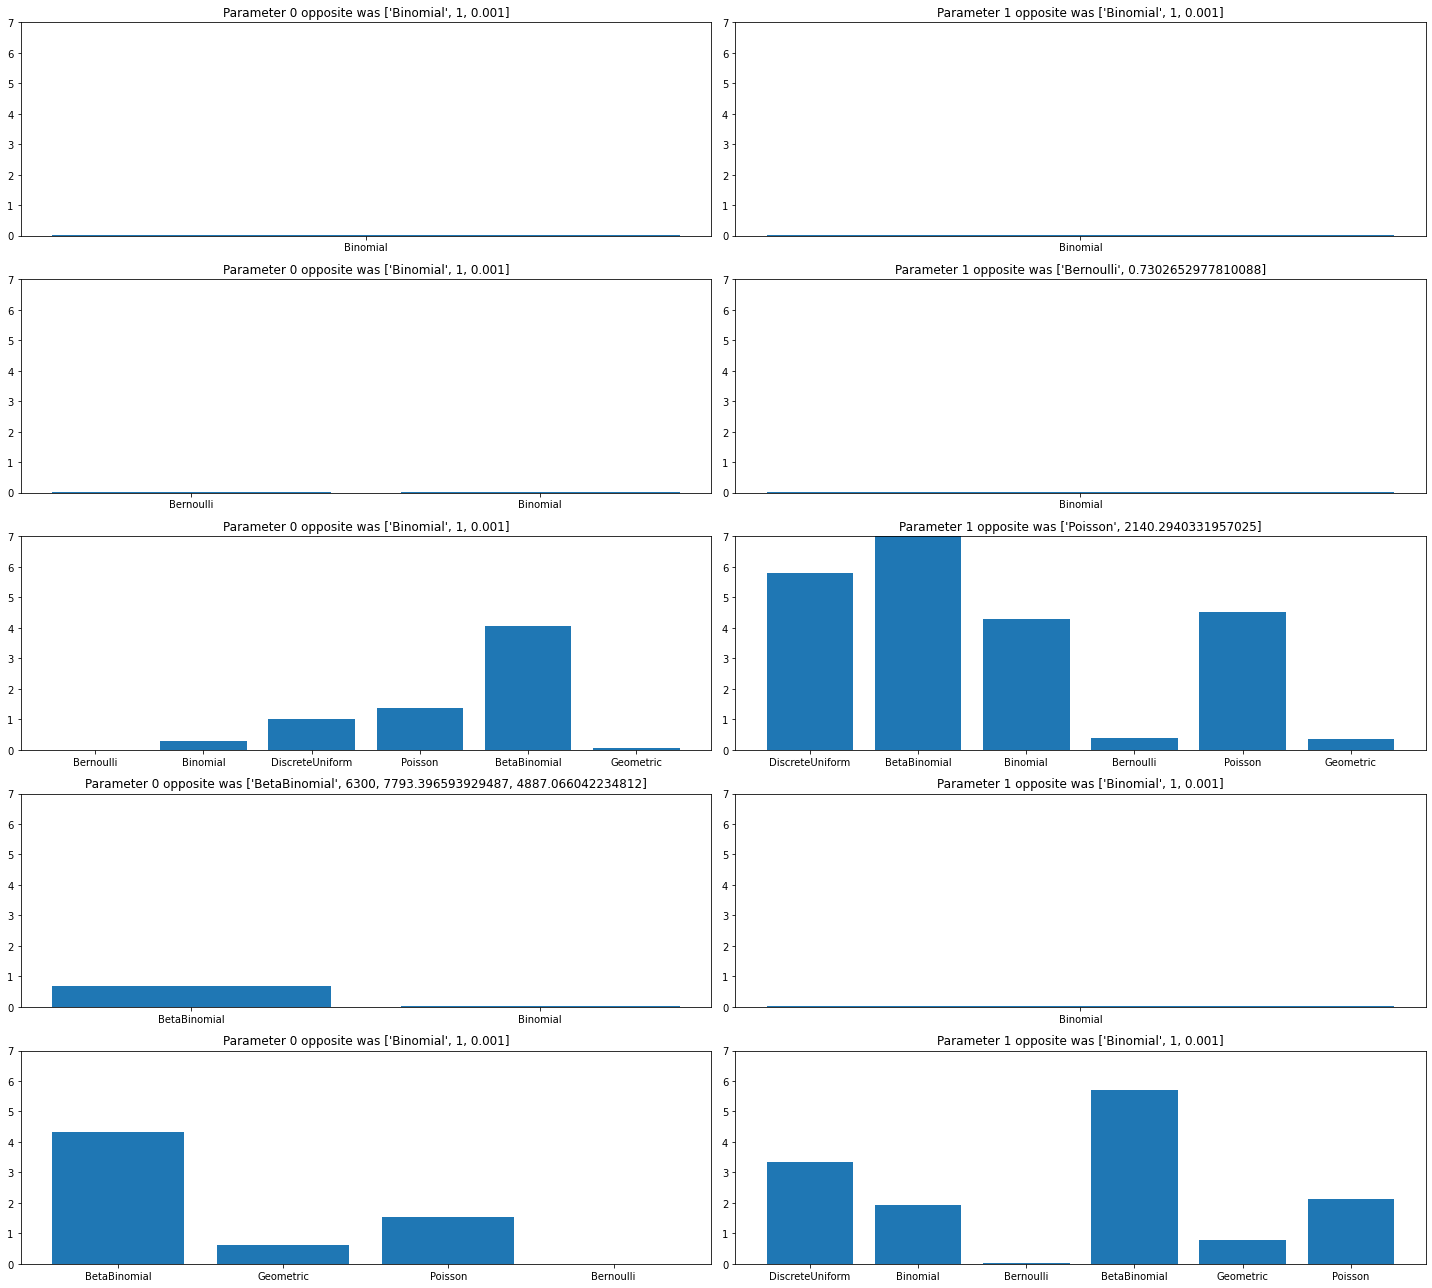

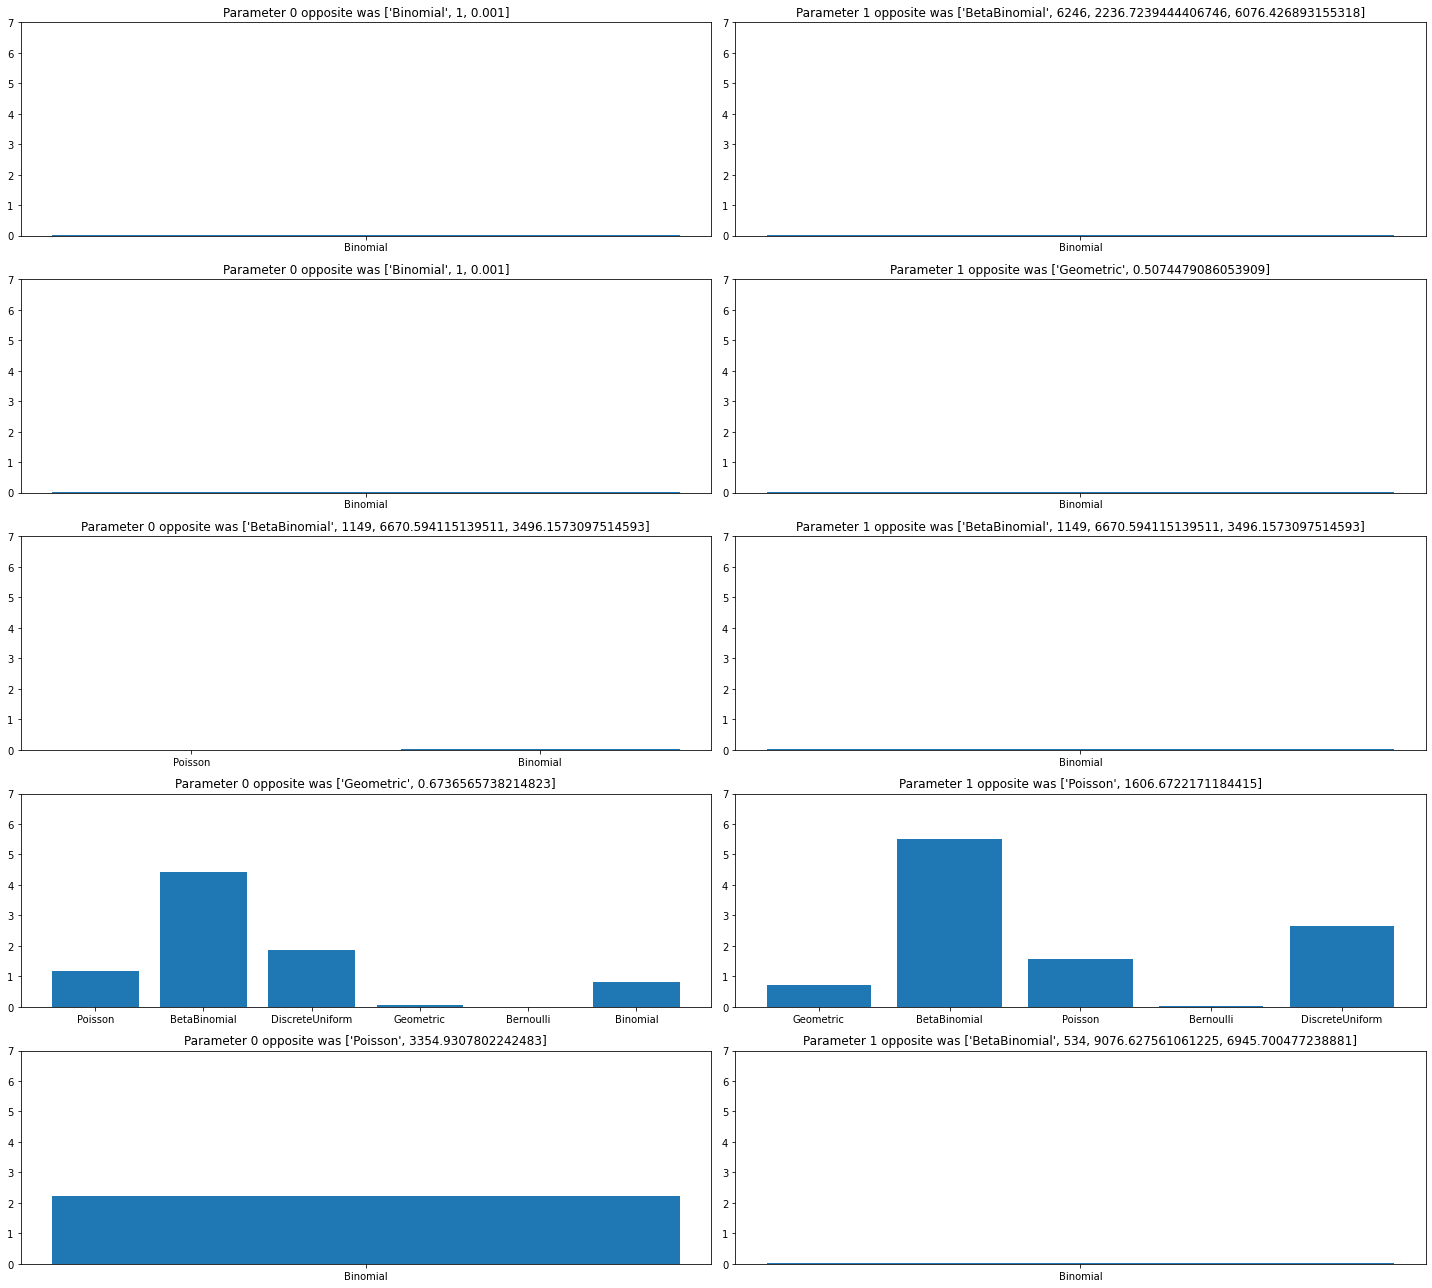

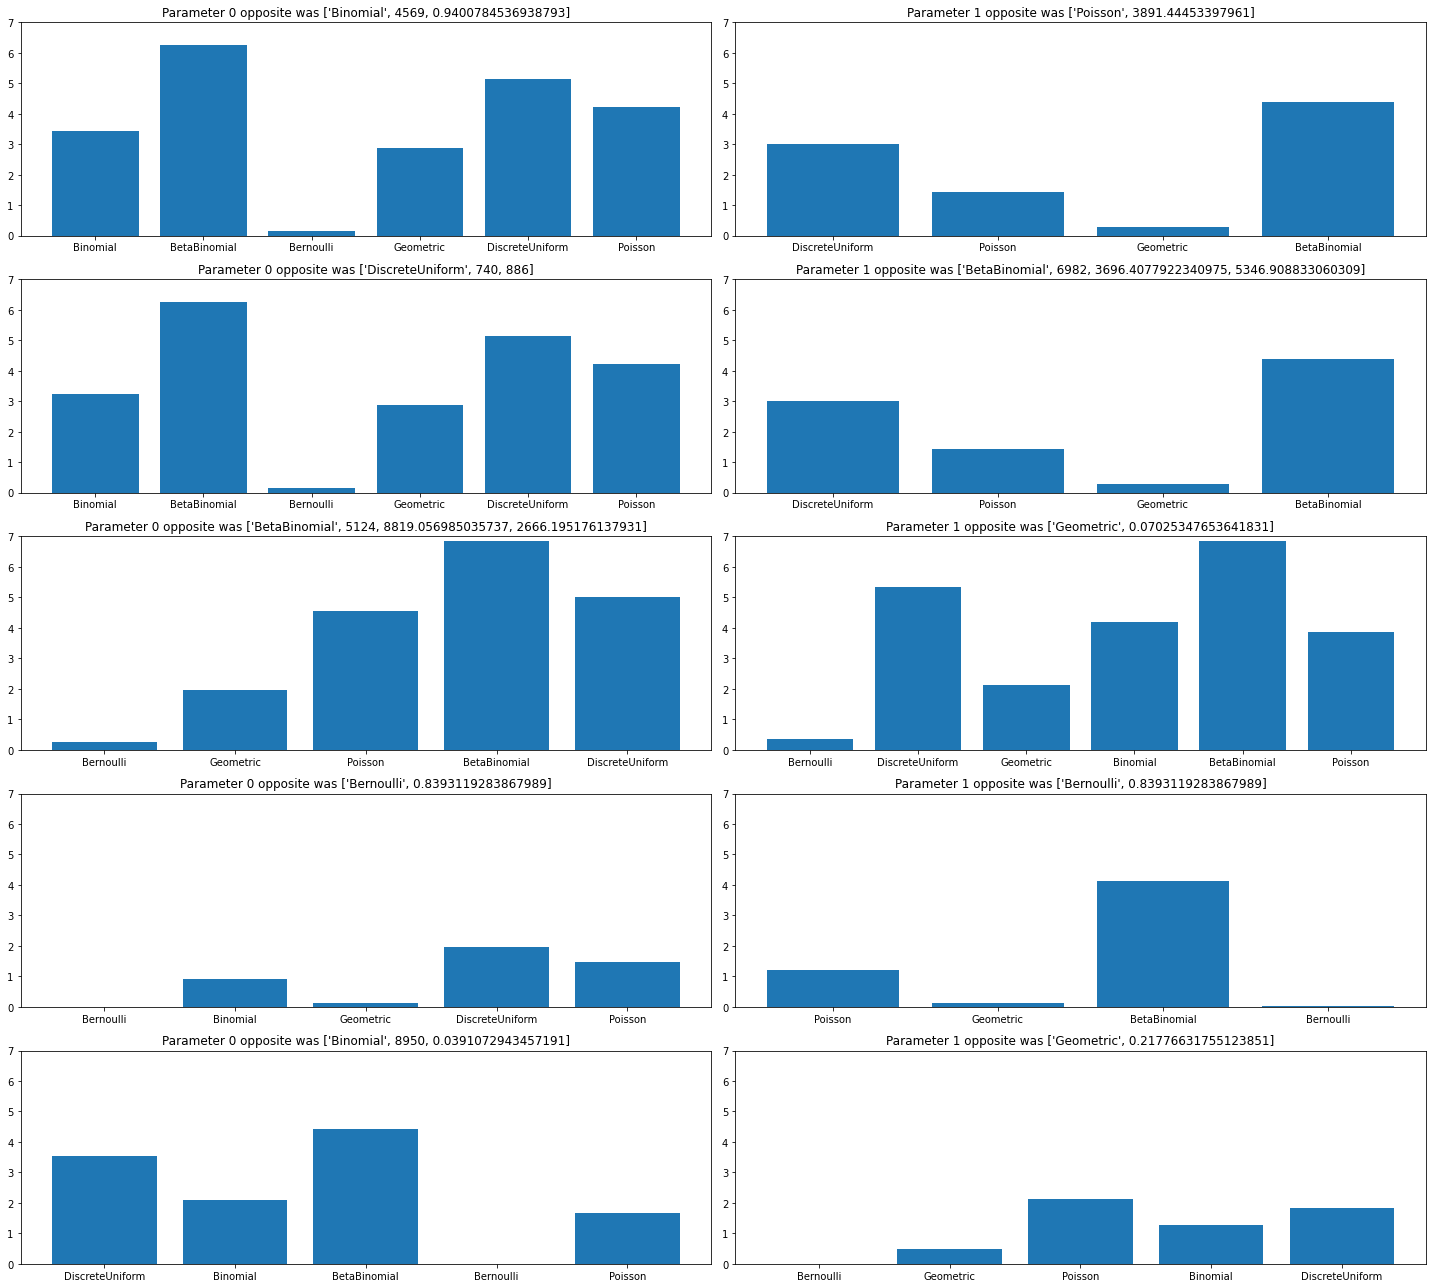

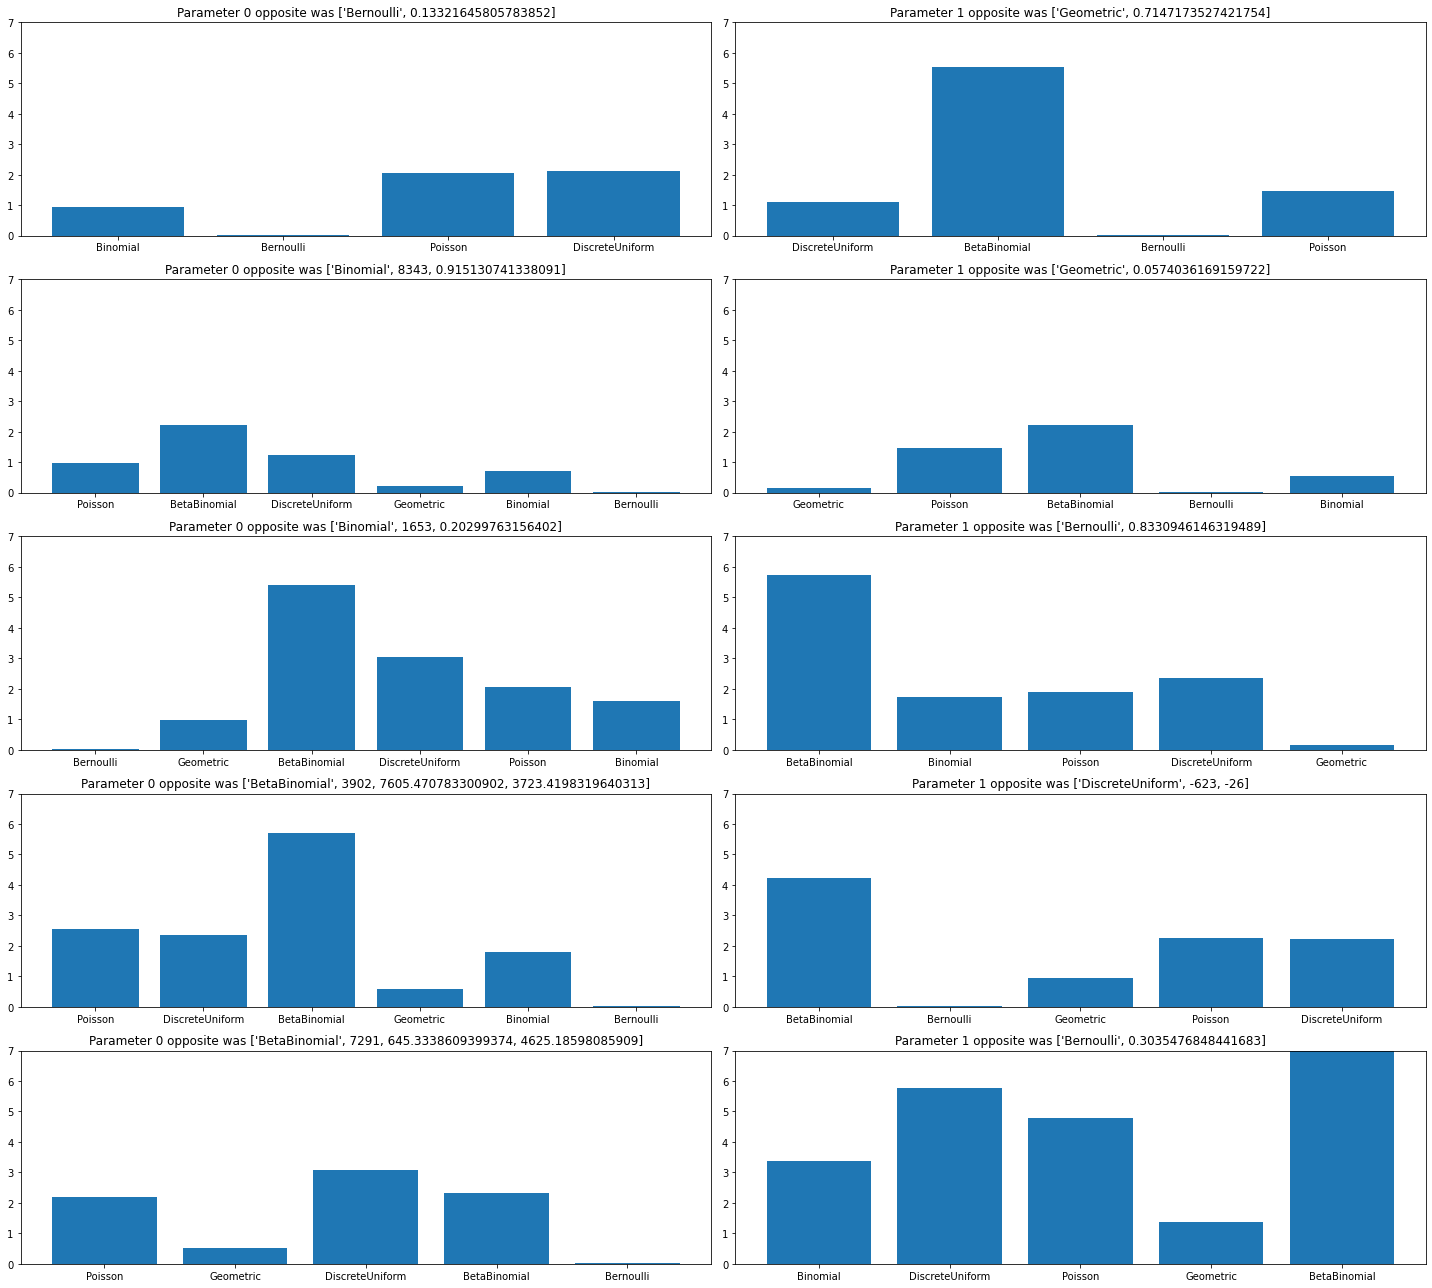

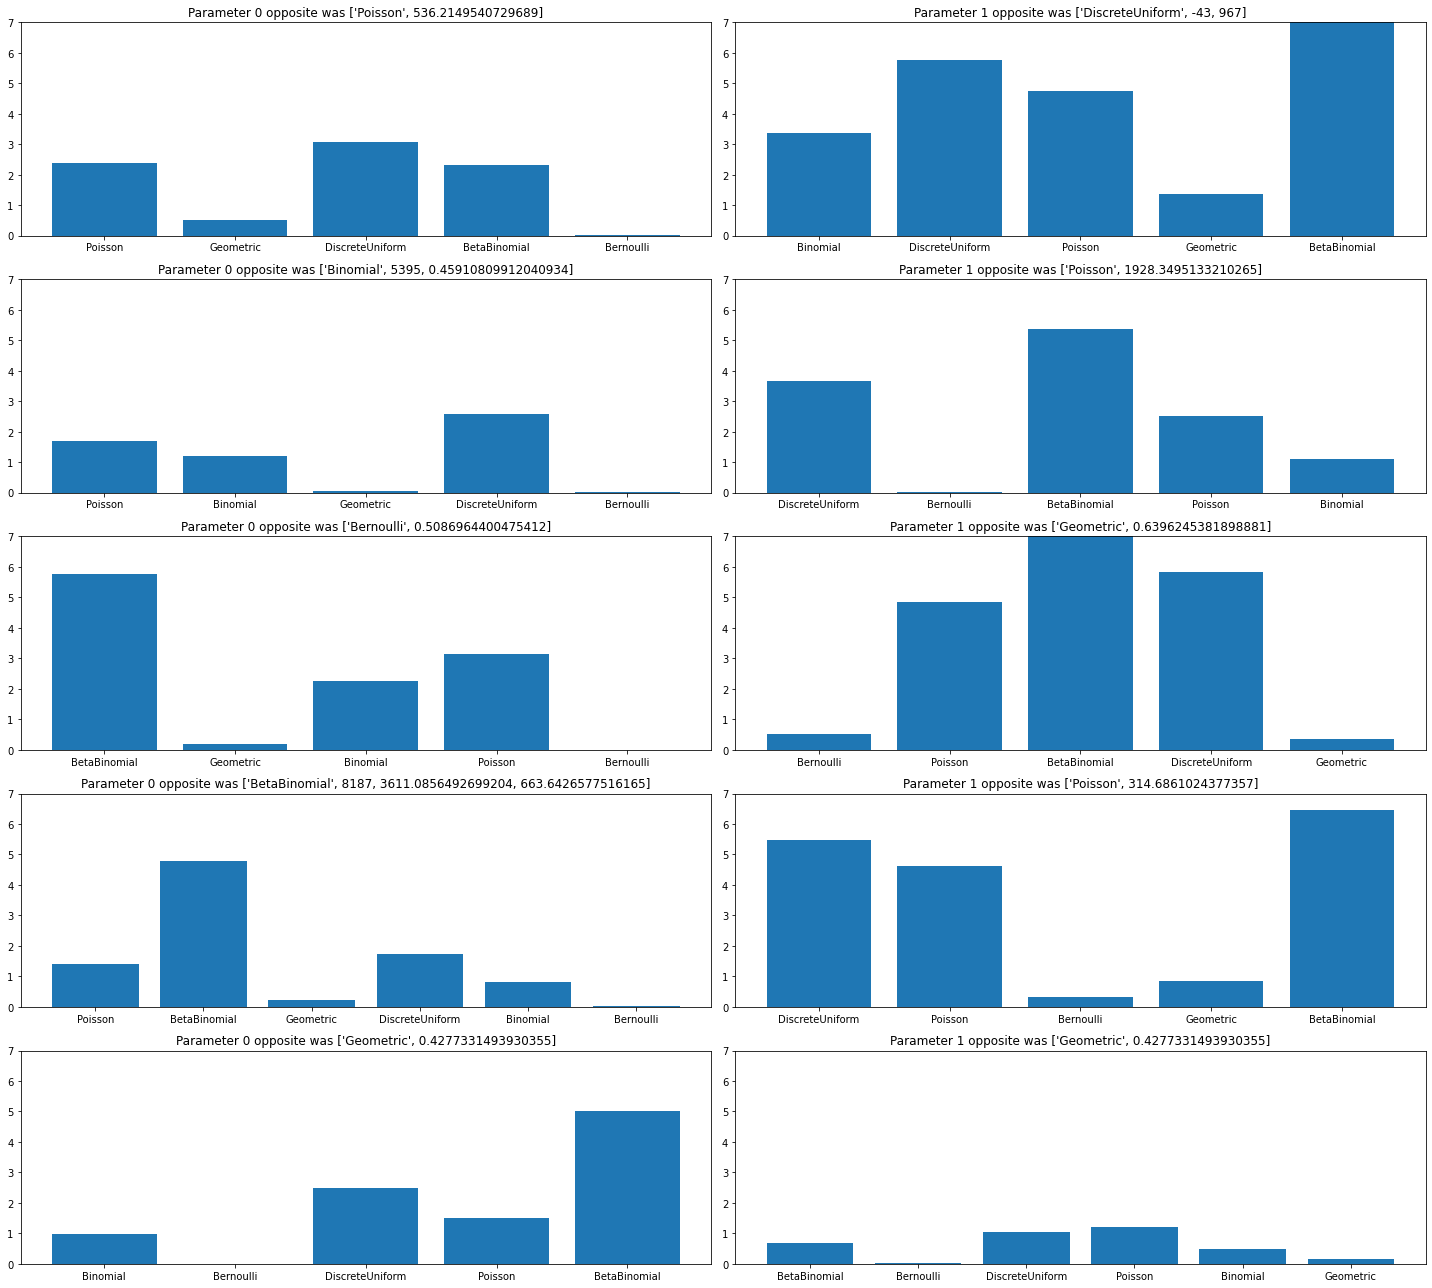

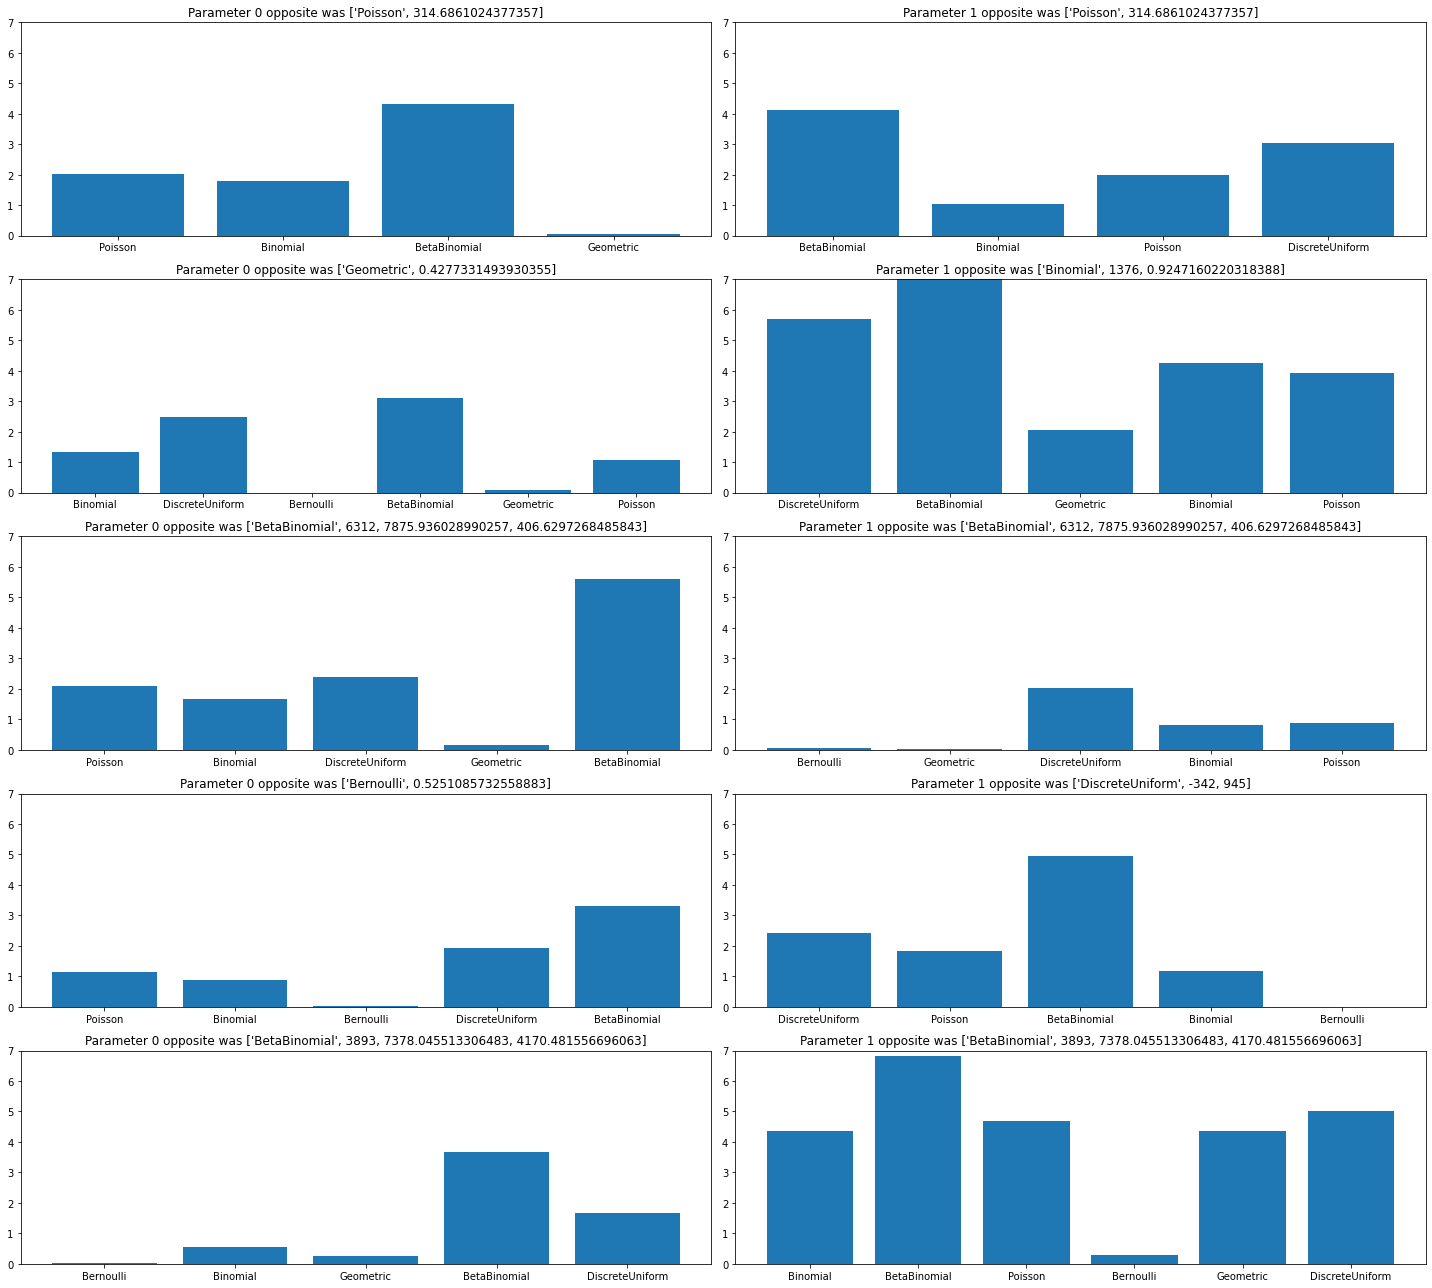

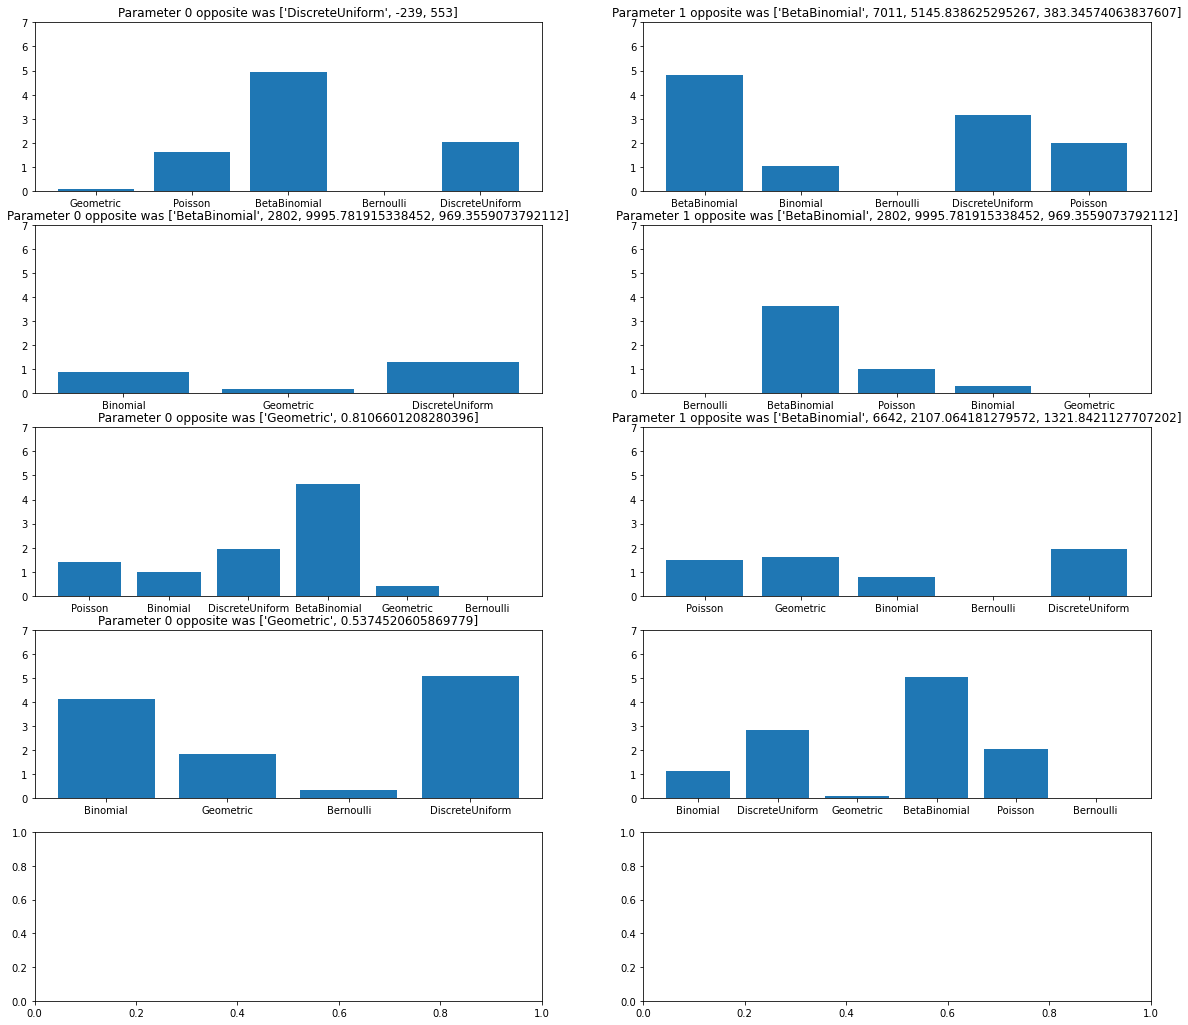

In [98]:
for i in range(0,50,5):
    plot_for_multiple_par(i)

## The report outline:
- Go over to overleaf

## Questions:
- Would it make sense to use the distributions all within one model, and than just sample all within that? 
- From both the QIF book and the Elements of Information Theory, again I have not read them from begining to end, but it seems as if they all work on discrete distributions.


# Meeting 28 - 10 - 2020
## What have been done:
- Report rewritting (more research related) based on the feedback from last time
- Started to write about how I am generating the distribution
    - Should I already here start talking about what strategies I can not cover?
- Does the section I included last time of linear search be included in the report?
- How long is my presentation?
- Floats are now only float16 (otherwise to many decimals) (is that a good idea?)
- Formulated a lot more about each distributions location:

In general I propose the following formula to generate distributions:

$X \sim \mathbb{d} \in \mathbb{D}_{privug}$ where $\mathbb{d}$ is bounded by $[L;H]$ 

$L, H \in \mathbb{R}$ such that $L < H$

Under the following assumption:

$L \leq E[X] \leq H$

$0 \leq Var(X) \leq H-L$

As long as the $E[X]$ is defined for that given distribution


## Cauchy vs. Normal
If H and L are given, does that mean Cauchy should not be used and instead simply use a Normal?

<IPython.core.display.Javascript object>


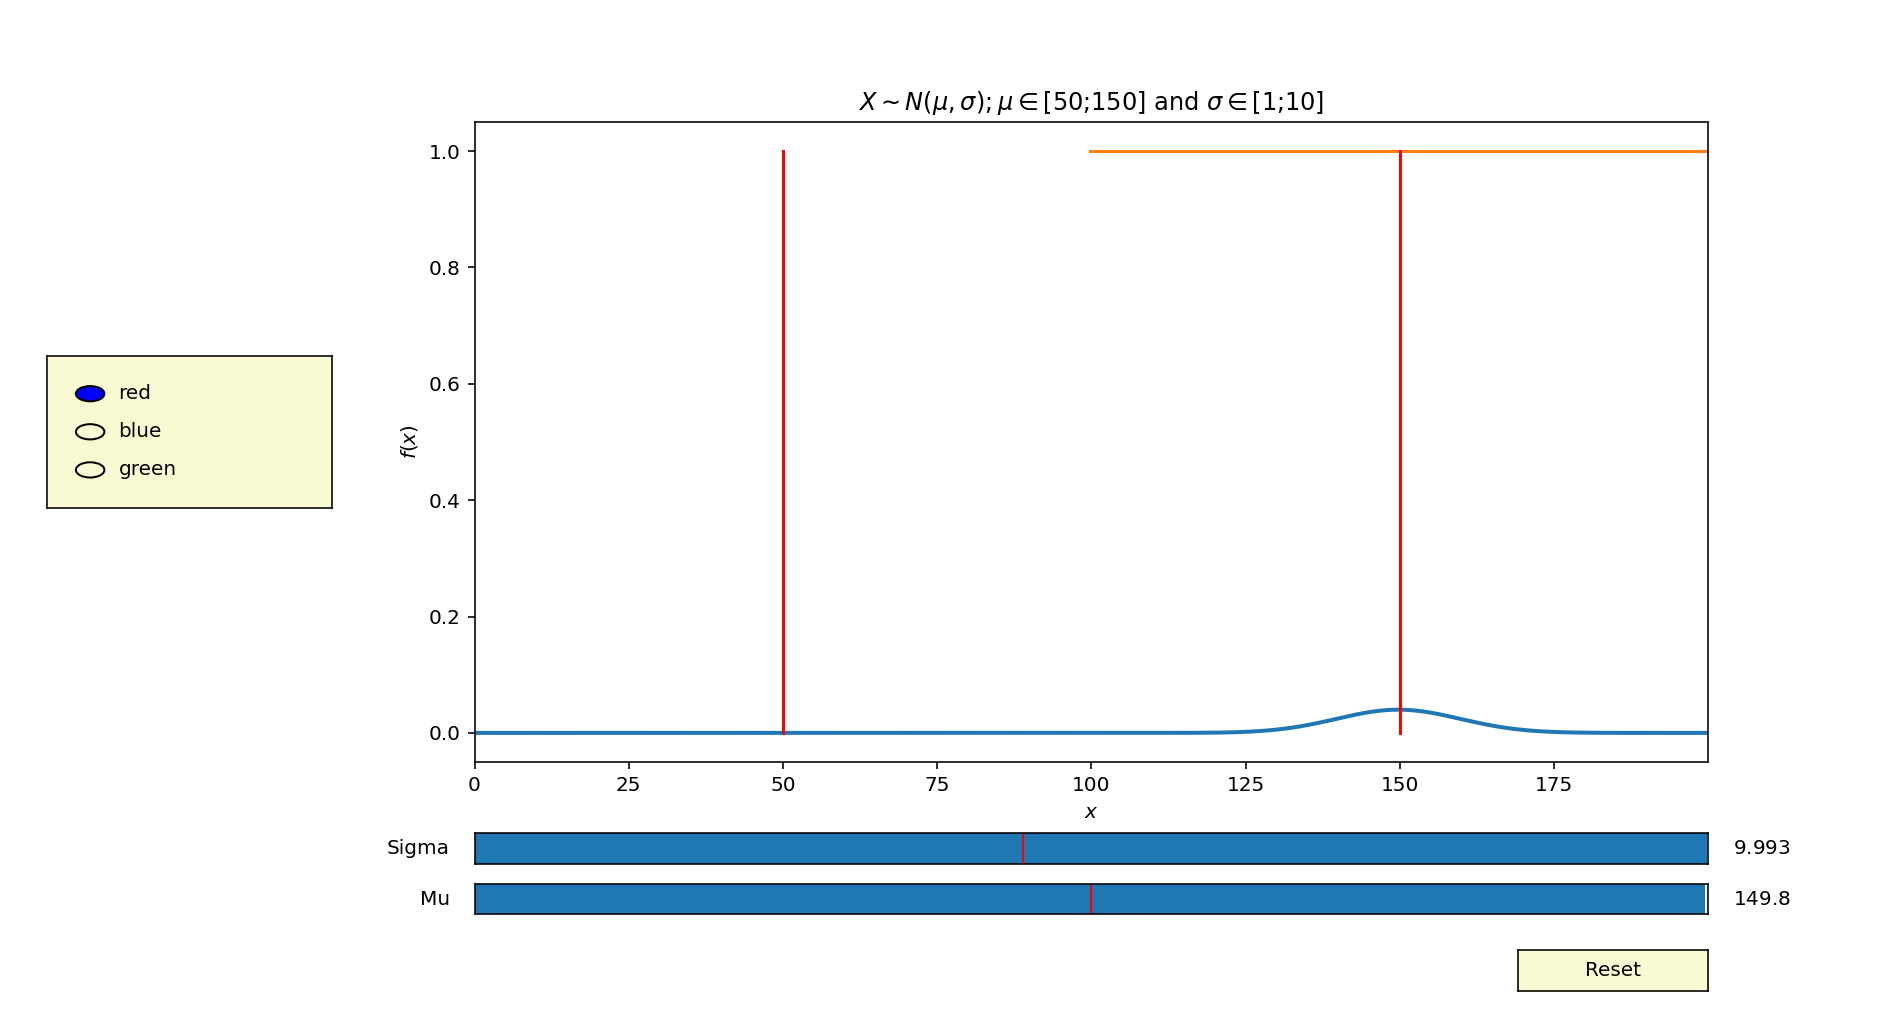

0

In [7]:
%matplotlib notebook
import privugger.Attacker.generators as gen
import privugger.Attacker.distributions as dis
import pymc3 as pm
import numpy as np
from matplotlib import pyplot as plt
import pymc3 as pm
import seaborn as sns
from hypothesis import given, settings, Phase, HealthCheck, strategies as st
from functools import reduce
from sklearn.feature_selection import mutual_info_regression
import theano
import theano.tensor as tt
import logging
from scipy.stats import *
from scipy import special
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons
from ipywidgets import interactive
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0, 200, 0.001)
mu = 100
sigma = 5
delta_f = 5.0
s = norm.pdf(t, mu, sigma)
l, = plt.plot(t, s, lw=2)
width, = plt.plot(np.linspace(mu-(sigma**2)/2,mu+(sigma**2)/2, 100),np.linspace(1,1,100))

plt.plot(np.linspace(50,50,100), np.linspace(0,1,100), color="Red")
plt.plot(np.linspace(150,150,100), np.linspace(0,1,100), color="Red")

plt.ylabel("$f(x)$")
plt.xlabel("$x$")
plt.title("$X \sim N(\mu, \sigma); \mu \in $[50;150] and $\sigma \in $[1;10]")
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Mu', 50, 150, valinit=mu)
samp = Slider(axamp, 'Sigma', 1,10, valinit=sigma)


def update(val):
    mu = sfreq.val
    sigma = samp.val
    l.set_ydata(norm.pdf(t, mu, sigma))
    width.set_xdata(np.linspace(mu-(sigma**2)/2,mu+(sigma**2)/2, 100))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

In [ ]:
values().filter(lambda mu,sigma: L <= mu <= H and H-L < sigma**2)

# 11-11-2020 Status

## Report:
Has made quite a lot of progress (I would personally think). But I have however struck a wall now. I am not 100% sure which method should be the method I use all the way through the code?
I have considered using a table similar to this one:

| Age            | Height       | Zip          | Disease      |
| :------------- | :----------: | :----------: | -----------: |
|  23            | 187.2        | 2200         | Asthma       |
|  53            | 167.3        | 2300         | Corona       |


And ideally I would "simply" use the differential privacy (but I find it hard actually finding a good library for that)
So what I maybe was considering was if we could use K-annonymnity?

ABSTRACT - 0%
INTRODUCTION - only need to find a good explanatory coding examples
PRIVUG(Background) - 15% done
GENERATING DISTRIBUTIONS - 20-35% done
RESULTS/ANALYSIS - Only have the data today (still missing the method)
    SUBSECTION(USABILITY OF THE PROGRAM?)
DISCUSSION/FUTURE WORK - 5% Started to talk about how strategies could be used and other mechanism.


### Questions:
- Would it make sense to have a table showing which distributions my program supports and which values it can represent?
- I chose to have an abbreviation for "Privacy protection mechanism" PPM is that okay?
- I have made the following images of how I propose my system should be used (to better explain Privug). Does that make sense?
- Another subsection on the result (Current state of the program?)
- Analysing a method (A nother section maybe?)


## Code:
- Managed to add bounds using `pm.Bounded` to limit the range of a distribution (in case a range has been set)
- Swapped to `float16` (limits the search space by a large factor) (A basic strategy)
- Debugged a lot and found that my problem with Alpha was the usability of Discrete Uniform (what caused the problem is still uncertain, but for now it is simply leaved out of the simulation code)
- Managed to have a good run on the alpha method.
- Updated the SimulationMetrics such that the interface is much more intuitive now

In [5]:
def alpha(database: List[Tuple[int, float]]) -> List[Tuple[int, float]]:
    return (reduce((lambda i, j: i + j),
                   list(map(lambda i: i[1], database)))
            /
            len(database))

In [ ]:
trace = simulate(alpha, max_examples=20, num_samples=2000, ranges=[(0,51),(0,100)], logging=False)
trace.save_to_file("") # Creates a file metrics-YYYY-MM-DD-HH-MM.priv

In [6]:
trace = SimulationMetrics(path="metrics-2020-11-05-12-00.priv")

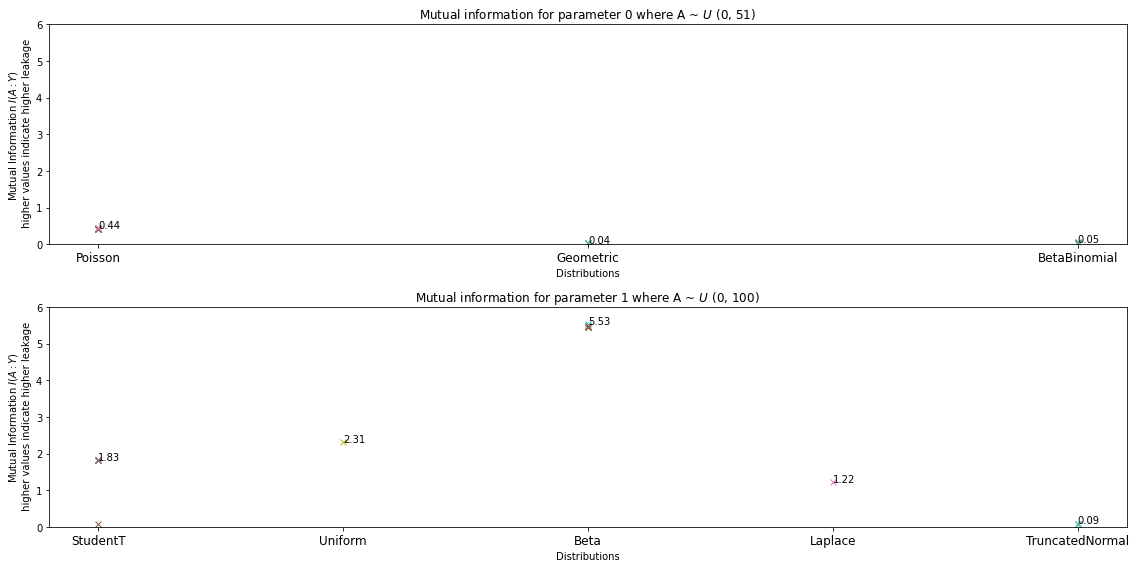

In [7]:
trace.plot_mutual_information(as_bar=False)

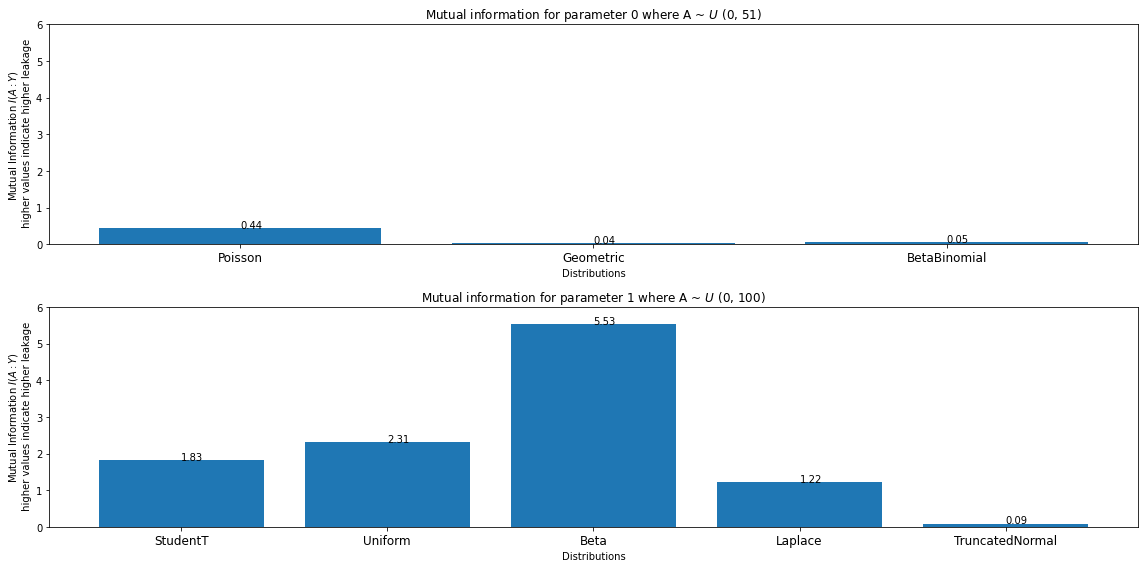

In [8]:
trace.plot_mutual_information()

In [9]:
trace.highest_leakage()

The distribution that had the most leakage was [(0.4423535636261118, ['Poisson', 0.0])] for parameter 0
The distribution that had the most leakage was [(5.533679036375068, ['Beta', 15.75, 33.5625])] for parameter 1


[[(0.4423535636261118, ['Poisson', 0.0])],
 [(5.533679036375068, ['Beta', 15.75, 33.5625])]]

The distribution that had the most leakage was [(0.4423535636261118, ['Poisson', 0.0])] for parameter 0
The distribution that had the most leakage was [(5.533679036375068, ['Beta', 15.75, 33.5625])] for parameter 1


<IPython.core.display.Javascript object>


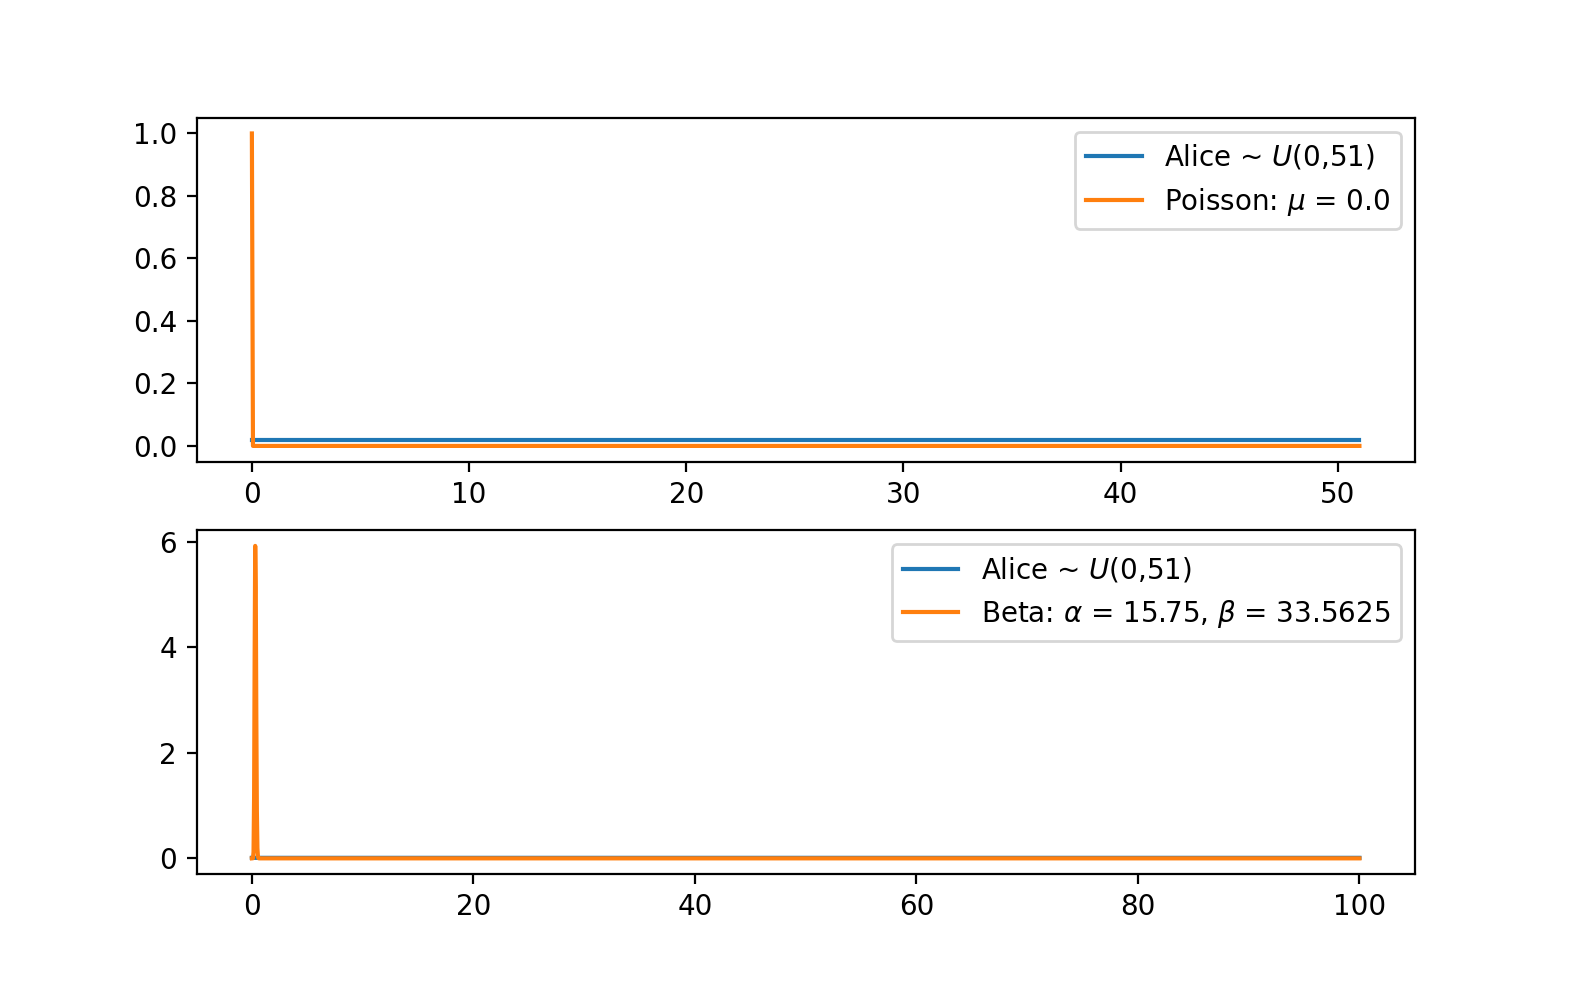

In [11]:
%matplotlib notebook
trace.plot_distributions()